### Linear Algebra, Calculus, and Gradient Descent

#### Objectives
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">

It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

Recommendation engines are able to make much more sophisticated recommendations by using linear algebra in conjunction with user and content data.

<img src = "./resources/netflix.png">

### Group 1: using code to explain vectors and scalars

In [ ]:
import numpy as np

## Vectors

An array with magnitude and direction. The coordinates of a vector represent where the tip of the vector would be if you travelled from the origin.


Operations with vectores
Assume

$ \vec{v} = \begin{bmatrix}v_{1} \\v_{2}\end{bmatrix} $


$ \vec{w} = \begin{bmatrix}w_{1} \\w_{2}\end{bmatrix} $

$ \vec{v} + \vec{w} = \begin{bmatrix}v_{1} + w_{1} \\v_{2} + w_{2}\end{bmatrix} $

What is happening graphically? Let's look at an example:


In [1]:
import numpy as np
v = np.array([2, 4])
w = np.array([3, 2])
v + w

array([5, 6])

#### Scalars

Have magnitude only. Can be multiplied by a vector or matrix to create a change in **scale** and/or direction.

What scalars would you need to change the direction of a vector?

In [2]:
v * 4

array([ 8, 16])

### Group 2: Desmos to explore vectors and scalars

[link to fun desmos interaction](https://www.desmos.com/calculator/yovo2ro9me)

To capture the relationship between (*a, b*), to capture the _direction_ rather than the length, what mathematical concept would you use?

### Group 3: Youtube vid

[Link to good video on scalars and vectors](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

## Linear Combination
If $v_{1},...,v_{n}$ are vectors and $a_{1},...,a_{n}$ are scalars, then the linear combination of those vectors with those scalars as coefficients is

<img src = "./resources/linear_combinations.svg"> 

### Dot Product

Can be thought of as one vector projected onto another

The dot product of v and w is $v \cdot w = (v_{1})(w_{2}) + (v_{1})(v_{2}) $

### _**Details of dot product for those who are interested**_

If v and w are perpendicular ($90^\circ$), their dot product will be 0.

If the angle between v and w is < $90^\circ$, the dot product will be positive.

If the angle between v and w is between $90^\circ$ and $180^\circ$, the dot product will be negative.





“The scalar projection of A onto B multiplied by the magnitude of B”

“The scalar projection of B onto A multiplied by the magnitude of A”

<img src = "./resources/dot_product.png">

<img src = "./resources/dot_product_components.png">

We are essentially, rotating vectors to the point of 
a · b = |a| × |b| × cos(θ)

Analogy from https://www.youtube.com/watch?v=FrDAU2N0FEg

In [3]:
v.dot(w)

14

## Application of dot product:

Imagine you are an e-commerce company. You have vectors to represent the transactions made with one of your items. Q is the quantity and represent the amount of cash either bought or sold.

$ Income = (q_{1},q_{2},q_{3})\cdot (p_{1},p_{2},p_{3}) $

What story is this telling?

In [ ]:
q = np.array([4,6,10])
p = np.array([50,-30,45])

q.dot(p)

Wait, does that look familiar somehow?

## Slide break!

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)

**Good video on details of gradient decent**

https://www.youtube.com/watch?v=sDv4f4s2SB8

### Gradient Descent


[slide deck!](https://docs.google.com/presentation/d/15sZl0yjwrjXkOSftImmAlEOgJxB7Qc8e2vocvMUkRWI/edit?usp=sharing)

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [5]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [6]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 25)
m, n = np.shape(x)

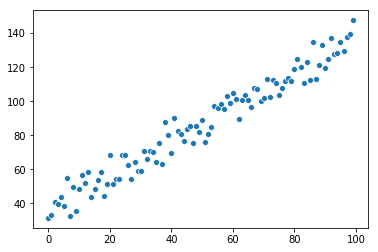

In [7]:
sns.scatterplot(x=x[:,1], y=y)

In [8]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

Iteration 0 | Cost: 167.853227
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 167.841680
[1.90603361 1.53393204]
Iteration 2 | Cost: 167.830830
[1.90611554 1.53361037]
Iteration 3 | Cost: 167.820632
[1.90619762 1.53329921]
Iteration 4 | Cost: 167.811044
[1.90627986 1.53299823]
Iteration 5 | Cost: 167.802027
[1.90636225 1.5327071 ]
Iteration 6 | Cost: 167.793544
[1.90644478 1.53242548]
Iteration 7 | Cost: 167.785561
[1.90652745 1.53215307]
Iteration 8 | Cost: 167.778044
[1.90661025 1.53188956]
Iteration 9 | Cost: 167.770965
[1.90669318 1.53163466]
Iteration 10 | Cost: 167.764294
[1.90677624 1.53138809]
Iteration 11 | Cost: 167.758006
[1.90685942 1.53114958]
Iteration 12 | Cost: 167.752075
[1.90694271 1.53091886]
Iteration 13 | Cost: 167.746479
[1.90702612 1.53069567]
Iteration 14 | Cost: 167.741196
[1.90710964 1.53047977]
Iteration 15 | Cost: 167.736205
[1.90719327 1.53027091]
Iteration 16 | Cost: 167.731489
[1.90727699 1.53006888]
Iteration 17 | Cost: 167.727028
[1.90736082 1.52987343]
It

Iteration 820 | Cost: 167.070087
[1.97686669 1.5231072 ]
Iteration 821 | Cost: 167.069338
[1.97695327 1.5231059 ]
Iteration 822 | Cost: 167.068588
[1.97703984 1.52310459]
Iteration 823 | Cost: 167.067838
[1.97712642 1.52310329]
Iteration 824 | Cost: 167.067089
[1.97721299 1.52310198]
Iteration 825 | Cost: 167.066339
[1.97729957 1.52310068]
Iteration 826 | Cost: 167.065589
[1.97738615 1.52309937]
Iteration 827 | Cost: 167.064839
[1.97747272 1.52309807]
Iteration 828 | Cost: 167.064090
[1.9775593  1.52309676]
Iteration 829 | Cost: 167.063340
[1.97764587 1.52309546]
Iteration 830 | Cost: 167.062590
[1.97773245 1.52309415]
Iteration 831 | Cost: 167.061841
[1.97781902 1.52309284]
Iteration 832 | Cost: 167.061091
[1.9779056  1.52309154]
Iteration 833 | Cost: 167.060341
[1.97799217 1.52309023]
Iteration 834 | Cost: 167.059592
[1.97807874 1.52308893]
Iteration 835 | Cost: 167.058842
[1.97816532 1.52308762]
Iteration 836 | Cost: 167.058092
[1.97825189 1.52308632]
Iteration 837 | Cost: 167.05734

Iteration 1556 | Cost: 166.519320
[2.04052778 1.52214741]
Iteration 1557 | Cost: 166.518573
[2.0406142  1.52214611]
Iteration 1558 | Cost: 166.517826
[2.04070061 1.52214481]
Iteration 1559 | Cost: 166.517079
[2.04078703 1.5221435 ]
Iteration 1560 | Cost: 166.516332
[2.04087344 1.5221422 ]
Iteration 1561 | Cost: 166.515585
[2.04095985 1.5221409 ]
Iteration 1562 | Cost: 166.514838
[2.04104627 1.5221396 ]
Iteration 1563 | Cost: 166.514091
[2.04113268 1.52213829]
Iteration 1564 | Cost: 166.513344
[2.0412191  1.52213699]
Iteration 1565 | Cost: 166.512597
[2.04130551 1.52213569]
Iteration 1566 | Cost: 166.511850
[2.04139192 1.52213439]
Iteration 1567 | Cost: 166.511104
[2.04147834 1.52213308]
Iteration 1568 | Cost: 166.510357
[2.04156475 1.52213178]
Iteration 1569 | Cost: 166.509610
[2.04165116 1.52213048]
Iteration 1570 | Cost: 166.508863
[2.04173757 1.52212917]
Iteration 1571 | Cost: 166.508116
[2.04182399 1.52212787]
Iteration 1572 | Cost: 166.507369
[2.0419104  1.52212657]
Iteration 1573

Iteration 2383 | Cost: 165.902903
[2.11191832 1.52107109]
Iteration 2384 | Cost: 165.902159
[2.11200456 1.52106979]
Iteration 2385 | Cost: 165.901416
[2.11209079 1.52106849]
Iteration 2386 | Cost: 165.900672
[2.11217703 1.52106719]
Iteration 2387 | Cost: 165.899928
[2.11226326 1.52106589]
Iteration 2388 | Cost: 165.899184
[2.11234949 1.52106459]
Iteration 2389 | Cost: 165.898440
[2.11243573 1.52106329]
Iteration 2390 | Cost: 165.897697
[2.11252196 1.52106199]
Iteration 2391 | Cost: 165.896953
[2.11260819 1.52106069]
Iteration 2392 | Cost: 165.896209
[2.11269442 1.52105939]
Iteration 2393 | Cost: 165.895465
[2.11278065 1.52105809]
Iteration 2394 | Cost: 165.894722
[2.11286689 1.52105679]
Iteration 2395 | Cost: 165.893978
[2.11295312 1.52105549]
Iteration 2396 | Cost: 165.893234
[2.11303935 1.52105419]
Iteration 2397 | Cost: 165.892490
[2.11312558 1.52105289]
Iteration 2398 | Cost: 165.891747
[2.11321181 1.52105159]
Iteration 2399 | Cost: 165.891003
[2.11329804 1.52105029]
Iteration 2400

[2.17877022 1.5200632 ]
Iteration 3160 | Cost: 165.326107
[2.17885629 1.5200619 ]
Iteration 3161 | Cost: 165.325366
[2.17894235 1.5200606 ]
Iteration 3162 | Cost: 165.324625
[2.17902842 1.5200593 ]
Iteration 3163 | Cost: 165.323884
[2.17911448 1.52005801]
Iteration 3164 | Cost: 165.323144
[2.17920054 1.52005671]
Iteration 3165 | Cost: 165.322403
[2.17928661 1.52005541]
Iteration 3166 | Cost: 165.321662
[2.17937267 1.52005411]
Iteration 3167 | Cost: 165.320921
[2.17945873 1.52005282]
Iteration 3168 | Cost: 165.320180
[2.1795448  1.52005152]
Iteration 3169 | Cost: 165.319439
[2.17963086 1.52005022]
Iteration 3170 | Cost: 165.318699
[2.17971692 1.52004892]
Iteration 3171 | Cost: 165.317958
[2.17980298 1.52004762]
Iteration 3172 | Cost: 165.317217
[2.17988904 1.52004633]
Iteration 3173 | Cost: 165.316476
[2.17997511 1.52004503]
Iteration 3174 | Cost: 165.315735
[2.18006117 1.52004373]
Iteration 3175 | Cost: 165.314994
[2.18014723 1.52004243]
Iteration 3176 | Cost: 165.314254
[2.18023329 1.

Iteration 4044 | Cost: 164.672640
[2.25485193 1.51891615]
Iteration 4045 | Cost: 164.671903
[2.2549378  1.51891485]
Iteration 4046 | Cost: 164.671165
[2.25502367 1.51891356]
Iteration 4047 | Cost: 164.670428
[2.25510954 1.51891226]
Iteration 4048 | Cost: 164.669690
[2.25519541 1.51891097]
Iteration 4049 | Cost: 164.668953
[2.25528128 1.51890967]
Iteration 4050 | Cost: 164.668215
[2.25536715 1.51890838]
Iteration 4051 | Cost: 164.667478
[2.25545302 1.51890708]
Iteration 4052 | Cost: 164.666740
[2.25553889 1.51890579]
Iteration 4053 | Cost: 164.666003
[2.25562476 1.51890449]
Iteration 4054 | Cost: 164.665265
[2.25571063 1.5189032 ]
Iteration 4055 | Cost: 164.664528
[2.2557965  1.51890191]
Iteration 4056 | Cost: 164.663790
[2.25588237 1.51890061]
Iteration 4057 | Cost: 164.663053
[2.25596824 1.51889932]
Iteration 4058 | Cost: 164.662315
[2.25605411 1.51889802]
Iteration 4059 | Cost: 164.661577
[2.25613998 1.51889673]
Iteration 4060 | Cost: 164.660840
[2.25622585 1.51889543]
Iteration 4061

Iteration 4888 | Cost: 164.051472
[2.32724998 1.51782463]
Iteration 4889 | Cost: 164.050737
[2.32733566 1.51782334]
Iteration 4890 | Cost: 164.050003
[2.32742135 1.51782205]
Iteration 4891 | Cost: 164.049269
[2.32750704 1.51782076]
Iteration 4892 | Cost: 164.048534
[2.32759272 1.51781947]
Iteration 4893 | Cost: 164.047800
[2.32767841 1.51781817]
Iteration 4894 | Cost: 164.047065
[2.3277641  1.51781688]
Iteration 4895 | Cost: 164.046331
[2.32784978 1.51781559]
Iteration 4896 | Cost: 164.045597
[2.32793547 1.5178143 ]
Iteration 4897 | Cost: 164.044862
[2.32802116 1.51781301]
Iteration 4898 | Cost: 164.044128
[2.32810684 1.51781172]
Iteration 4899 | Cost: 164.043393
[2.32819253 1.51781042]
Iteration 4900 | Cost: 164.042659
[2.32827821 1.51780913]
Iteration 4901 | Cost: 164.041925
[2.3283639  1.51780784]
Iteration 4902 | Cost: 164.041190
[2.32844958 1.51780655]
Iteration 4903 | Cost: 164.040456
[2.32853527 1.51780526]
Iteration 4904 | Cost: 164.039722
[2.32862095 1.51780396]
Iteration 4905

[2.39316523 1.51683086]
Iteration 5659 | Cost: 163.486350
[2.39325075 1.51682957]
Iteration 5660 | Cost: 163.485619
[2.39333627 1.51682828]
Iteration 5661 | Cost: 163.484887
[2.39342179 1.51682699]
Iteration 5662 | Cost: 163.484155
[2.39350731 1.5168257 ]
Iteration 5663 | Cost: 163.483424
[2.39359283 1.51682441]
Iteration 5664 | Cost: 163.482692
[2.39367835 1.51682312]
Iteration 5665 | Cost: 163.481961
[2.39376387 1.51682183]
Iteration 5666 | Cost: 163.481229
[2.39384939 1.51682055]
Iteration 5667 | Cost: 163.480498
[2.3939349  1.51681926]
Iteration 5668 | Cost: 163.479766
[2.39402042 1.51681797]
Iteration 5669 | Cost: 163.479035
[2.39410594 1.51681668]
Iteration 5670 | Cost: 163.478303
[2.39419146 1.51681539]
Iteration 5671 | Cost: 163.477572
[2.39427698 1.5168141 ]
Iteration 5672 | Cost: 163.476840
[2.39436249 1.51681281]
Iteration 5673 | Cost: 163.476109
[2.39444801 1.51681152]
Iteration 5674 | Cost: 163.475377
[2.39453353 1.51681023]
Iteration 5675 | Cost: 163.474646
[2.39461905 1.

Iteration 6525 | Cost: 162.854227
[2.46723013 1.51571422]
Iteration 6526 | Cost: 162.853498
[2.46731546 1.51571293]
Iteration 6527 | Cost: 162.852770
[2.46740079 1.51571164]
Iteration 6528 | Cost: 162.852042
[2.46748612 1.51571036]
Iteration 6529 | Cost: 162.851313
[2.46757146 1.51570907]
Iteration 6530 | Cost: 162.850585
[2.46765679 1.51570779]
Iteration 6531 | Cost: 162.849857
[2.46774212 1.5157065 ]
Iteration 6532 | Cost: 162.849129
[2.46782745 1.51570521]
Iteration 6533 | Cost: 162.848400
[2.46791278 1.51570393]
Iteration 6534 | Cost: 162.847672
[2.46799811 1.51570264]
Iteration 6535 | Cost: 162.846944
[2.46808344 1.51570135]
Iteration 6536 | Cost: 162.846215
[2.46816877 1.51570007]
Iteration 6537 | Cost: 162.845487
[2.4682541  1.51569878]
Iteration 6538 | Cost: 162.844759
[2.46833943 1.51569749]
Iteration 6539 | Cost: 162.844030
[2.46842476 1.51569621]
Iteration 6540 | Cost: 162.843302
[2.46851009 1.51569492]
Iteration 6541 | Cost: 162.842574
[2.46859542 1.51569363]
Iteration 6542

Iteration 7356 | Cost: 162.250257
[2.53806692 1.51464624]
Iteration 7357 | Cost: 162.249532
[2.53815207 1.51464496]
Iteration 7358 | Cost: 162.248807
[2.53823722 1.51464368]
Iteration 7359 | Cost: 162.248081
[2.53832238 1.51464239]
Iteration 7360 | Cost: 162.247356
[2.53840753 1.51464111]
Iteration 7361 | Cost: 162.246631
[2.53849268 1.51463982]
Iteration 7362 | Cost: 162.245906
[2.53857783 1.51463854]
Iteration 7363 | Cost: 162.245180
[2.53866298 1.51463726]
Iteration 7364 | Cost: 162.244455
[2.53874814 1.51463597]
Iteration 7365 | Cost: 162.243730
[2.53883329 1.51463469]
Iteration 7366 | Cost: 162.243005
[2.53891844 1.51463341]
Iteration 7367 | Cost: 162.242279
[2.53900359 1.51463212]
Iteration 7368 | Cost: 162.241554
[2.53908874 1.51463084]
Iteration 7369 | Cost: 162.240829
[2.53917389 1.51462955]
Iteration 7370 | Cost: 162.240104
[2.53925904 1.51462827]
Iteration 7371 | Cost: 162.239379
[2.53934419 1.51462699]
Iteration 7372 | Cost: 162.238653
[2.53942934 1.5146257 ]
Iteration 7373

Iteration 8158 | Cost: 161.669775
[2.60629019 1.51361767]
Iteration 8159 | Cost: 161.669053
[2.60637517 1.51361639]
Iteration 8160 | Cost: 161.668330
[2.60646015 1.51361511]
Iteration 8161 | Cost: 161.667608
[2.60654513 1.51361383]
Iteration 8162 | Cost: 161.666886
[2.60663011 1.51361255]
Iteration 8163 | Cost: 161.666163
[2.60671509 1.51361127]
Iteration 8164 | Cost: 161.665441
[2.60680007 1.51360999]
Iteration 8165 | Cost: 161.664719
[2.60688505 1.5136087 ]
Iteration 8166 | Cost: 161.663996
[2.60697003 1.51360742]
Iteration 8167 | Cost: 161.663274
[2.607055   1.51360614]
Iteration 8168 | Cost: 161.662552
[2.60713998 1.51360486]
Iteration 8169 | Cost: 161.661830
[2.60722496 1.51360358]
Iteration 8170 | Cost: 161.661107
[2.60730994 1.5136023 ]
Iteration 8171 | Cost: 161.660385
[2.60739491 1.51360102]
Iteration 8172 | Cost: 161.659663
[2.60747989 1.51359974]
Iteration 8173 | Cost: 161.658940
[2.60756487 1.51359846]
Iteration 8174 | Cost: 161.658218
[2.60764984 1.51359717]
Iteration 8175

[2.67946283 1.51251448]
Iteration 9021 | Cost: 161.047774
[2.67954763 1.5125132 ]
Iteration 9022 | Cost: 161.047055
[2.67963242 1.51251193]
Iteration 9023 | Cost: 161.046336
[2.67971721 1.51251065]
Iteration 9024 | Cost: 161.045617
[2.67980201 1.51250937]
Iteration 9025 | Cost: 161.044897
[2.6798868  1.51250809]
Iteration 9026 | Cost: 161.044178
[2.67997159 1.51250681]
Iteration 9027 | Cost: 161.043459
[2.68005639 1.51250553]
Iteration 9028 | Cost: 161.042740
[2.68014118 1.51250426]
Iteration 9029 | Cost: 161.042021
[2.68022597 1.51250298]
Iteration 9030 | Cost: 161.041302
[2.68031076 1.5125017 ]
Iteration 9031 | Cost: 161.040583
[2.68039556 1.51250042]
Iteration 9032 | Cost: 161.039863
[2.68048035 1.51249914]
Iteration 9033 | Cost: 161.039144
[2.68056514 1.51249786]
Iteration 9034 | Cost: 161.038425
[2.68064993 1.51249658]
Iteration 9035 | Cost: 161.037706
[2.68073472 1.51249531]
Iteration 9036 | Cost: 161.036987
[2.68081951 1.51249403]
Iteration 9037 | Cost: 161.036268
[2.6809043  1.

[2.75459078 1.51138181]
Iteration 9908 | Cost: 160.411308
[2.75467538 1.51138054]
Iteration 9909 | Cost: 160.410592
[2.75475998 1.51137926]
Iteration 9910 | Cost: 160.409876
[2.75484459 1.51137799]
Iteration 9911 | Cost: 160.409160
[2.75492919 1.51137671]
Iteration 9912 | Cost: 160.408444
[2.75501379 1.51137544]
Iteration 9913 | Cost: 160.407728
[2.7550984  1.51137416]
Iteration 9914 | Cost: 160.407012
[2.755183   1.51137288]
Iteration 9915 | Cost: 160.406296
[2.7552676  1.51137161]
Iteration 9916 | Cost: 160.405580
[2.7553522  1.51137033]
Iteration 9917 | Cost: 160.404864
[2.7554368  1.51136906]
Iteration 9918 | Cost: 160.404148
[2.7555214  1.51136778]
Iteration 9919 | Cost: 160.403432
[2.75560601 1.51136651]
Iteration 9920 | Cost: 160.402717
[2.75569061 1.51136523]
Iteration 9921 | Cost: 160.402001
[2.75577521 1.51136396]
Iteration 9922 | Cost: 160.401285
[2.75585981 1.51136268]
Iteration 9923 | Cost: 160.400569
[2.75594441 1.5113614 ]
Iteration 9924 | Cost: 160.399853
[2.75602901 1.

Iteration 10810 | Cost: 159.767009
[2.83090043 1.51023133]
Iteration 10811 | Cost: 159.766296
[2.83098484 1.51023005]
Iteration 10812 | Cost: 159.765584
[2.83106925 1.51022878]
Iteration 10813 | Cost: 159.764871
[2.83115366 1.51022751]
Iteration 10814 | Cost: 159.764158
[2.83123807 1.51022624]
Iteration 10815 | Cost: 159.763446
[2.83132248 1.51022496]
Iteration 10816 | Cost: 159.762733
[2.83140689 1.51022369]
Iteration 10817 | Cost: 159.762020
[2.8314913  1.51022242]
Iteration 10818 | Cost: 159.761308
[2.8315757  1.51022115]
Iteration 10819 | Cost: 159.760595
[2.83166011 1.51021987]
Iteration 10820 | Cost: 159.759882
[2.83174452 1.5102186 ]
Iteration 10821 | Cost: 159.759170
[2.83182893 1.51021733]
Iteration 10822 | Cost: 159.758457
[2.83191334 1.51021606]
Iteration 10823 | Cost: 159.757745
[2.83199774 1.51021478]
Iteration 10824 | Cost: 159.757032
[2.83208215 1.51021351]
Iteration 10825 | Cost: 159.756319
[2.83216656 1.51021224]
Iteration 10826 | Cost: 159.755607
[2.83225096 1.5102109

Iteration 11657 | Cost: 159.164675
[2.90231898 1.50915458]
Iteration 11658 | Cost: 159.163966
[2.90240321 1.50915331]
Iteration 11659 | Cost: 159.163256
[2.90248744 1.50915204]
Iteration 11660 | Cost: 159.162547
[2.90257166 1.50915077]
Iteration 11661 | Cost: 159.161837
[2.90265589 1.5091495 ]
Iteration 11662 | Cost: 159.161127
[2.90274012 1.50914823]
Iteration 11663 | Cost: 159.160418
[2.90282435 1.50914696]
Iteration 11664 | Cost: 159.159708
[2.90290857 1.50914569]
Iteration 11665 | Cost: 159.158999
[2.9029928  1.50914442]
Iteration 11666 | Cost: 159.158289
[2.90307703 1.50914315]
Iteration 11667 | Cost: 159.157580
[2.90316126 1.50914188]
Iteration 11668 | Cost: 159.156870
[2.90324548 1.50914061]
Iteration 11669 | Cost: 159.156160
[2.90332971 1.50913934]
Iteration 11670 | Cost: 159.155451
[2.90341394 1.50913807]
Iteration 11671 | Cost: 159.154741
[2.90349816 1.5091368 ]
Iteration 11672 | Cost: 159.154032
[2.90358239 1.50913553]
Iteration 11673 | Cost: 159.153322
[2.90366661 1.5091342

Iteration 12561 | Cost: 158.524657
[2.97837461 1.50800793]
Iteration 12562 | Cost: 158.523950
[2.97845864 1.50800666]
Iteration 12563 | Cost: 158.523244
[2.97854268 1.50800539]
Iteration 12564 | Cost: 158.522538
[2.97862671 1.50800413]
Iteration 12565 | Cost: 158.521831
[2.97871075 1.50800286]
Iteration 12566 | Cost: 158.521125
[2.97879478 1.50800159]
Iteration 12567 | Cost: 158.520419
[2.97887882 1.50800032]
Iteration 12568 | Cost: 158.519712
[2.97896285 1.50799906]
Iteration 12569 | Cost: 158.519006
[2.97904689 1.50799779]
Iteration 12570 | Cost: 158.518300
[2.97913092 1.50799652]
Iteration 12571 | Cost: 158.517593
[2.97921496 1.50799526]
Iteration 12572 | Cost: 158.516887
[2.97929899 1.50799399]
Iteration 12573 | Cost: 158.516181
[2.97938302 1.50799272]
Iteration 12574 | Cost: 158.515474
[2.97946706 1.50799146]
Iteration 12575 | Cost: 158.514768
[2.97955109 1.50799019]
Iteration 12576 | Cost: 158.514062
[2.97963512 1.50798892]
Iteration 12577 | Cost: 158.513355
[2.97971915 1.5079876

[3.04930887 1.50693848]
Iteration 13407 | Cost: 157.928355
[3.04939273 1.50693722]
Iteration 13408 | Cost: 157.927651
[3.04947658 1.50693595]
Iteration 13409 | Cost: 157.926948
[3.04956044 1.50693469]
Iteration 13410 | Cost: 157.926245
[3.04964429 1.50693343]
Iteration 13411 | Cost: 157.925541
[3.04972815 1.50693216]
Iteration 13412 | Cost: 157.924838
[3.049812  1.5069309]
Iteration 13413 | Cost: 157.924135
[3.04989586 1.50692963]
Iteration 13414 | Cost: 157.923432
[3.04997971 1.50692837]
Iteration 13415 | Cost: 157.922728
[3.05006357 1.5069271 ]
Iteration 13416 | Cost: 157.922025
[3.05014742 1.50692584]
Iteration 13417 | Cost: 157.921322
[3.05023127 1.50692458]
Iteration 13418 | Cost: 157.920618
[3.05031513 1.50692331]
Iteration 13419 | Cost: 157.919915
[3.05039898 1.50692205]
Iteration 13420 | Cost: 157.919212
[3.05048283 1.50692078]
Iteration 13421 | Cost: 157.918508
[3.05056669 1.50691952]
Iteration 13422 | Cost: 157.917805
[3.05065054 1.50691826]
Iteration 13423 | Cost: 157.917102

Iteration 14360 | Cost: 157.259693
[3.12921068 1.50573384]
Iteration 14361 | Cost: 157.258993
[3.12929434 1.50573258]
Iteration 14362 | Cost: 157.258293
[3.12937799 1.50573132]
Iteration 14363 | Cost: 157.257593
[3.12946164 1.50573006]
Iteration 14364 | Cost: 157.256893
[3.12954529 1.5057288 ]
Iteration 14365 | Cost: 157.256193
[3.12962895 1.50572753]
Iteration 14366 | Cost: 157.255493
[3.1297126  1.50572627]
Iteration 14367 | Cost: 157.254793
[3.12979625 1.50572501]
Iteration 14368 | Cost: 157.254093
[3.1298799  1.50572375]
Iteration 14369 | Cost: 157.253393
[3.12996355 1.50572249]
Iteration 14370 | Cost: 157.252693
[3.1300472  1.50572123]
Iteration 14371 | Cost: 157.251994
[3.13013086 1.50571997]
Iteration 14372 | Cost: 157.251294
[3.13021451 1.50571871]
Iteration 14373 | Cost: 157.250594
[3.13029816 1.50571744]
Iteration 14374 | Cost: 157.249894
[3.13038181 1.50571618]
Iteration 14375 | Cost: 157.249194
[3.13046546 1.50571492]
Iteration 14376 | Cost: 157.248494
[3.13054911 1.5057136

Iteration 15156 | Cost: 156.703661
[3.19573144 1.50473094]
Iteration 15157 | Cost: 156.702964
[3.19581492 1.50472968]
Iteration 15158 | Cost: 156.702267
[3.19589841 1.50472842]
Iteration 15159 | Cost: 156.701570
[3.19598189 1.50472716]
Iteration 15160 | Cost: 156.700873
[3.19606537 1.5047259 ]
Iteration 15161 | Cost: 156.700175
[3.19614886 1.50472464]
Iteration 15162 | Cost: 156.699478
[3.19623234 1.50472339]
Iteration 15163 | Cost: 156.698781
[3.19631582 1.50472213]
Iteration 15164 | Cost: 156.698084
[3.19639931 1.50472087]
Iteration 15165 | Cost: 156.697387
[3.19648279 1.50471961]
Iteration 15166 | Cost: 156.696690
[3.19656627 1.50471835]
Iteration 15167 | Cost: 156.695993
[3.19664975 1.50471709]
Iteration 15168 | Cost: 156.695296
[3.19673324 1.50471583]
Iteration 15169 | Cost: 156.694599
[3.19681672 1.50471457]
Iteration 15170 | Cost: 156.693902
[3.1969002  1.50471332]
Iteration 15171 | Cost: 156.693205
[3.19698368 1.50471206]
Iteration 15172 | Cost: 156.692508
[3.19706716 1.5047108

Iteration 16099 | Cost: 156.047845
[3.27436316 1.50354544]
Iteration 16100 | Cost: 156.047151
[3.27444644 1.50354419]
Iteration 16101 | Cost: 156.046457
[3.27452973 1.50354293]
Iteration 16102 | Cost: 156.045763
[3.27461301 1.50354168]
Iteration 16103 | Cost: 156.045070
[3.27469629 1.50354042]
Iteration 16104 | Cost: 156.044376
[3.27477958 1.50353916]
Iteration 16105 | Cost: 156.043682
[3.27486286 1.50353791]
Iteration 16106 | Cost: 156.042988
[3.27494614 1.50353665]
Iteration 16107 | Cost: 156.042294
[3.27502943 1.5035354 ]
Iteration 16108 | Cost: 156.041601
[3.27511271 1.50353414]
Iteration 16109 | Cost: 156.040907
[3.27519599 1.50353289]
Iteration 16110 | Cost: 156.040213
[3.27527928 1.50353163]
Iteration 16111 | Cost: 156.039519
[3.27536256 1.50353038]
Iteration 16112 | Cost: 156.038826
[3.27544584 1.50352912]
Iteration 16113 | Cost: 156.038132
[3.27552912 1.50352786]
Iteration 16114 | Cost: 156.037438
[3.27561241 1.50352661]
Iteration 16115 | Cost: 156.036744
[3.27569569 1.5035253

Iteration 16954 | Cost: 155.455935
[3.34549459 1.50247303]
Iteration 16955 | Cost: 155.455244
[3.3455777  1.50247177]
Iteration 16956 | Cost: 155.454554
[3.3456608  1.50247052]
Iteration 16957 | Cost: 155.453863
[3.34574391 1.50246927]
Iteration 16958 | Cost: 155.453172
[3.34582701 1.50246801]
Iteration 16959 | Cost: 155.452481
[3.34591011 1.50246676]
Iteration 16960 | Cost: 155.451790
[3.34599322 1.50246551]
Iteration 16961 | Cost: 155.451100
[3.34607632 1.50246426]
Iteration 16962 | Cost: 155.450409
[3.34615942 1.502463  ]
Iteration 16963 | Cost: 155.449718
[3.34624253 1.50246175]
Iteration 16964 | Cost: 155.449027
[3.34632563 1.5024605 ]
Iteration 16965 | Cost: 155.448337
[3.34640873 1.50245924]
Iteration 16966 | Cost: 155.447646
[3.34649183 1.50245799]
Iteration 16967 | Cost: 155.446955
[3.34657494 1.50245674]
Iteration 16968 | Cost: 155.446264
[3.34665804 1.50245549]
Iteration 16969 | Cost: 155.445574
[3.34674114 1.50245423]
Iteration 16970 | Cost: 155.444883
[3.34682424 1.5024529

Iteration 17873 | Cost: 154.822576
[3.42177863 1.50132293]
Iteration 17874 | Cost: 154.821888
[3.42186154 1.50132168]
Iteration 17875 | Cost: 154.821201
[3.42194445 1.50132043]
Iteration 17876 | Cost: 154.820513
[3.42202736 1.50131918]
Iteration 17877 | Cost: 154.819826
[3.42211027 1.50131793]
Iteration 17878 | Cost: 154.819138
[3.42219318 1.50131668]
Iteration 17879 | Cost: 154.818450
[3.42227609 1.50131543]
Iteration 17880 | Cost: 154.817763
[3.422359   1.50131418]
Iteration 17881 | Cost: 154.817075
[3.42244191 1.50131293]
Iteration 17882 | Cost: 154.816388
[3.42252482 1.50131168]
Iteration 17883 | Cost: 154.815700
[3.42260773 1.50131043]
Iteration 17884 | Cost: 154.815013
[3.42269064 1.50130918]
Iteration 17885 | Cost: 154.814325
[3.42277355 1.50130793]
Iteration 17886 | Cost: 154.813638
[3.42285645 1.50130668]
Iteration 17887 | Cost: 154.812950
[3.42293936 1.50130543]
Iteration 17888 | Cost: 154.812263
[3.42302227 1.50130418]
Iteration 17889 | Cost: 154.811575
[3.42310518 1.5013029

Iteration 18729 | Cost: 154.235286
[3.49267337 1.50025408]
Iteration 18730 | Cost: 154.234601
[3.4927561  1.50025283]
Iteration 18731 | Cost: 154.233917
[3.49283883 1.50025159]
Iteration 18732 | Cost: 154.233232
[3.49292156 1.50025034]
Iteration 18733 | Cost: 154.232547
[3.49300429 1.50024909]
Iteration 18734 | Cost: 154.231863
[3.49308702 1.50024784]
Iteration 18735 | Cost: 154.231178
[3.49316975 1.5002466 ]
Iteration 18736 | Cost: 154.230494
[3.49325248 1.50024535]
Iteration 18737 | Cost: 154.229809
[3.49333521 1.5002441 ]
Iteration 18738 | Cost: 154.229125
[3.49341794 1.50024285]
Iteration 18739 | Cost: 154.228440
[3.49350067 1.50024161]
Iteration 18740 | Cost: 154.227755
[3.4935834  1.50024036]
Iteration 18741 | Cost: 154.227071
[3.49366613 1.50023911]
Iteration 18742 | Cost: 154.226386
[3.49374885 1.50023787]
Iteration 18743 | Cost: 154.225702
[3.49383158 1.50023662]
Iteration 18744 | Cost: 154.225017
[3.49391431 1.50023537]
Iteration 18745 | Cost: 154.224333
[3.49399704 1.5002341

[3.56910987 1.49910168]
Iteration 19655 | Cost: 153.602836
[3.5691924  1.49910044]
Iteration 19656 | Cost: 153.602154
[3.56927494 1.49909919]
Iteration 19657 | Cost: 153.601473
[3.56935748 1.49909795]
Iteration 19658 | Cost: 153.600791
[3.56944001 1.4990967 ]
Iteration 19659 | Cost: 153.600110
[3.56952255 1.49909546]
Iteration 19660 | Cost: 153.599429
[3.56960509 1.49909422]
Iteration 19661 | Cost: 153.598747
[3.56968762 1.49909297]
Iteration 19662 | Cost: 153.598066
[3.56977016 1.49909173]
Iteration 19663 | Cost: 153.597385
[3.56985269 1.49909048]
Iteration 19664 | Cost: 153.596703
[3.56993523 1.49908924]
Iteration 19665 | Cost: 153.596022
[3.57001776 1.49908799]
Iteration 19666 | Cost: 153.595341
[3.5701003  1.49908675]
Iteration 19667 | Cost: 153.594659
[3.57018283 1.4990855 ]
Iteration 19668 | Cost: 153.593978
[3.57026537 1.49908426]
Iteration 19669 | Cost: 153.593297
[3.5703479  1.49908302]
Iteration 19670 | Cost: 153.592615
[3.57043043 1.49908177]
Iteration 19671 | Cost: 153.5919

[3.64899011 1.49789736]
Iteration 20624 | Cost: 152.944191
[3.64907245 1.49789612]
Iteration 20625 | Cost: 152.943513
[3.64915478 1.49789488]
Iteration 20626 | Cost: 152.942835
[3.64923711 1.49789364]
Iteration 20627 | Cost: 152.942157
[3.64931945 1.4978924 ]
Iteration 20628 | Cost: 152.941479
[3.64940178 1.49789116]
Iteration 20629 | Cost: 152.940801
[3.64948411 1.49788992]
Iteration 20630 | Cost: 152.940123
[3.64956645 1.49788867]
Iteration 20631 | Cost: 152.939445
[3.64964878 1.49788743]
Iteration 20632 | Cost: 152.938767
[3.64973111 1.49788619]
Iteration 20633 | Cost: 152.938089
[3.64981345 1.49788495]
Iteration 20634 | Cost: 152.937411
[3.64989578 1.49788371]
Iteration 20635 | Cost: 152.936733
[3.64997811 1.49788247]
Iteration 20636 | Cost: 152.936055
[3.65006044 1.49788123]
Iteration 20637 | Cost: 152.935377
[3.65014277 1.49787999]
Iteration 20638 | Cost: 152.934699
[3.65022511 1.49787874]
Iteration 20639 | Cost: 152.934021
[3.65030744 1.4978775 ]
Iteration 20640 | Cost: 152.9333

Iteration 21498 | Cost: 152.352891
[3.72095286 1.49681241]
Iteration 21499 | Cost: 152.352216
[3.72103501 1.49681118]
Iteration 21500 | Cost: 152.351541
[3.72111716 1.49680994]
Iteration 21501 | Cost: 152.350866
[3.72119931 1.4968087 ]
Iteration 21502 | Cost: 152.350191
[3.72128146 1.49680746]
Iteration 21503 | Cost: 152.349516
[3.72136361 1.49680622]
Iteration 21504 | Cost: 152.348841
[3.72144577 1.49680498]
Iteration 21505 | Cost: 152.348166
[3.72152792 1.49680374]
Iteration 21506 | Cost: 152.347491
[3.72161007 1.49680251]
Iteration 21507 | Cost: 152.346816
[3.72169222 1.49680127]
Iteration 21508 | Cost: 152.346141
[3.72177437 1.49680003]
Iteration 21509 | Cost: 152.345466
[3.72185652 1.49679879]
Iteration 21510 | Cost: 152.344791
[3.72193867 1.49679755]
Iteration 21511 | Cost: 152.344116
[3.72202081 1.49679631]
Iteration 21512 | Cost: 152.343441
[3.72210296 1.49679507]
Iteration 21513 | Cost: 152.342766
[3.72218511 1.49679384]
Iteration 21514 | Cost: 152.342091
[3.72226726 1.4967926

Iteration 22404 | Cost: 151.742703
[3.79529699 1.49569156]
Iteration 22405 | Cost: 151.742031
[3.79537895 1.49569033]
Iteration 22406 | Cost: 151.741359
[3.79546091 1.49568909]
Iteration 22407 | Cost: 151.740687
[3.79554288 1.49568785]
Iteration 22408 | Cost: 151.740015
[3.79562484 1.49568662]
Iteration 22409 | Cost: 151.739343
[3.7957068  1.49568538]
Iteration 22410 | Cost: 151.738671
[3.79578876 1.49568415]
Iteration 22411 | Cost: 151.737999
[3.79587072 1.49568291]
Iteration 22412 | Cost: 151.737328
[3.79595269 1.49568168]
Iteration 22413 | Cost: 151.736656
[3.79603465 1.49568044]
Iteration 22414 | Cost: 151.735984
[3.79611661 1.4956792 ]
Iteration 22415 | Cost: 151.735312
[3.79619857 1.49567797]
Iteration 22416 | Cost: 151.734640
[3.79628053 1.49567673]
Iteration 22417 | Cost: 151.733968
[3.79636249 1.4956755 ]
Iteration 22418 | Cost: 151.733296
[3.79644445 1.49567426]
Iteration 22419 | Cost: 151.732624
[3.79652641 1.49567303]
Iteration 22420 | Cost: 151.731952
[3.79660837 1.4956717

Iteration 23401 | Cost: 151.074461
[3.8769111 1.4944611]
Iteration 23402 | Cost: 151.073793
[3.87699285 1.49445987]
Iteration 23403 | Cost: 151.073124
[3.87707461 1.49445864]
Iteration 23404 | Cost: 151.072455
[3.87715636 1.49445741]
Iteration 23405 | Cost: 151.071787
[3.87723812 1.49445617]
Iteration 23406 | Cost: 151.071118
[3.87731987 1.49445494]
Iteration 23407 | Cost: 151.070450
[3.87740163 1.49445371]
Iteration 23408 | Cost: 151.069781
[3.87748338 1.49445248]
Iteration 23409 | Cost: 151.069113
[3.87756514 1.49445124]
Iteration 23410 | Cost: 151.068444
[3.87764689 1.49445001]
Iteration 23411 | Cost: 151.067776
[3.87772865 1.49444878]
Iteration 23412 | Cost: 151.067107
[3.8778104  1.49444755]
Iteration 23413 | Cost: 151.066439
[3.87789215 1.49444631]
Iteration 23414 | Cost: 151.065770
[3.87797391 1.49444508]
Iteration 23415 | Cost: 151.065102
[3.87805566 1.49444385]
Iteration 23416 | Cost: 151.064433
[3.87813742 1.49444261]
Iteration 23417 | Cost: 151.063765
[3.87821917 1.49444138]

Iteration 24223 | Cost: 150.526050
[3.94404466 1.49344896]
Iteration 24224 | Cost: 150.525385
[3.94412625 1.49344773]
Iteration 24225 | Cost: 150.524719
[3.94420783 1.4934465 ]
Iteration 24226 | Cost: 150.524053
[3.94428942 1.49344527]
Iteration 24227 | Cost: 150.523387
[3.944371   1.49344404]
Iteration 24228 | Cost: 150.522722
[3.94445259 1.49344281]
Iteration 24229 | Cost: 150.522056
[3.94453417 1.49344158]
Iteration 24230 | Cost: 150.521390
[3.94461576 1.49344035]
Iteration 24231 | Cost: 150.520724
[3.94469734 1.49343912]
Iteration 24232 | Cost: 150.520059
[3.94477893 1.49343789]
Iteration 24233 | Cost: 150.519393
[3.94486051 1.49343666]
Iteration 24234 | Cost: 150.518727
[3.9449421  1.49343543]
Iteration 24235 | Cost: 150.518061
[3.94502368 1.4934342 ]
Iteration 24236 | Cost: 150.517396
[3.94510526 1.49343297]
Iteration 24237 | Cost: 150.516730
[3.94518685 1.49343174]
Iteration 24238 | Cost: 150.516064
[3.94526843 1.49343051]
Iteration 24239 | Cost: 150.515398
[3.94535001 1.4934292

Iteration 25153 | Cost: 149.908337
[4.01983008 1.49230638]
Iteration 25154 | Cost: 149.907675
[4.01991148 1.49230515]
Iteration 25155 | Cost: 149.907012
[4.01999287 1.49230393]
Iteration 25156 | Cost: 149.906350
[4.02007426 1.4923027 ]
Iteration 25157 | Cost: 149.905687
[4.02015565 1.49230147]
Iteration 25158 | Cost: 149.905024
[4.02023705 1.49230024]
Iteration 25159 | Cost: 149.904362
[4.02031844 1.49229902]
Iteration 25160 | Cost: 149.903699
[4.02039983 1.49229779]
Iteration 25161 | Cost: 149.903036
[4.02048122 1.49229656]
Iteration 25162 | Cost: 149.902374
[4.02056262 1.49229534]
Iteration 25163 | Cost: 149.901711
[4.02064401 1.49229411]
Iteration 25164 | Cost: 149.901049
[4.0207254  1.49229288]
Iteration 25165 | Cost: 149.900386
[4.02080679 1.49229165]
Iteration 25166 | Cost: 149.899723
[4.02088818 1.49229043]
Iteration 25167 | Cost: 149.899061
[4.02096957 1.4922892 ]
Iteration 25168 | Cost: 149.898398
[4.02105096 1.49228797]
Iteration 25169 | Cost: 149.897736
[4.02113235 1.4922867

Iteration 26124 | Cost: 149.266495
[4.09876599 1.4911163 ]
Iteration 26125 | Cost: 149.265836
[4.09884719 1.49111507]
Iteration 26126 | Cost: 149.265176
[4.09892838 1.49111385]
Iteration 26127 | Cost: 149.264517
[4.09900957 1.49111263]
Iteration 26128 | Cost: 149.263858
[4.09909077 1.4911114 ]
Iteration 26129 | Cost: 149.263198
[4.09917196 1.49111018]
Iteration 26130 | Cost: 149.262539
[4.09925315 1.49110895]
Iteration 26131 | Cost: 149.261879
[4.09933434 1.49110773]
Iteration 26132 | Cost: 149.261220
[4.09941553 1.49110651]
Iteration 26133 | Cost: 149.260561
[4.09949673 1.49110528]
Iteration 26134 | Cost: 149.259901
[4.09957792 1.49110406]
Iteration 26135 | Cost: 149.259242
[4.09965911 1.49110283]
Iteration 26136 | Cost: 149.258583
[4.0997403  1.49110161]
Iteration 26137 | Cost: 149.257923
[4.09982149 1.49110039]
Iteration 26138 | Cost: 149.257264
[4.09990268 1.49109916]
Iteration 26139 | Cost: 149.256605
[4.09998387 1.49109794]
Iteration 26140 | Cost: 149.255945
[4.10006506 1.4910967

Iteration 26943 | Cost: 148.727580
[4.16519429 1.49011479]
Iteration 26944 | Cost: 148.726923
[4.16527532 1.49011357]
Iteration 26945 | Cost: 148.726266
[4.16535634 1.49011235]
Iteration 26946 | Cost: 148.725610
[4.16543736 1.49011113]
Iteration 26947 | Cost: 148.724953
[4.16551839 1.4901099 ]
Iteration 26948 | Cost: 148.724296
[4.16559941 1.49010868]
Iteration 26949 | Cost: 148.723640
[4.16568044 1.49010746]
Iteration 26950 | Cost: 148.722983
[4.16576146 1.49010624]
Iteration 26951 | Cost: 148.722326
[4.16584248 1.49010502]
Iteration 26952 | Cost: 148.721670
[4.16592351 1.4901038 ]
Iteration 26953 | Cost: 148.721013
[4.16600453 1.49010257]
Iteration 26954 | Cost: 148.720357
[4.16608555 1.49010135]
Iteration 26955 | Cost: 148.719700
[4.16616657 1.49010013]
Iteration 26956 | Cost: 148.719043
[4.1662476  1.49009891]
Iteration 26957 | Cost: 148.718387
[4.16632862 1.49009769]
Iteration 26958 | Cost: 148.717730
[4.16640964 1.49009647]
Iteration 26959 | Cost: 148.717074
[4.16649066 1.4900952

[4.24280261 1.48894472]
Iteration 27903 | Cost: 148.098728
[4.24288344 1.48894351]
Iteration 27904 | Cost: 148.098075
[4.24296427 1.48894229]
Iteration 27905 | Cost: 148.097421
[4.2430451  1.48894107]
Iteration 27906 | Cost: 148.096768
[4.24312592 1.48893985]
Iteration 27907 | Cost: 148.096115
[4.24320675 1.48893863]
Iteration 27908 | Cost: 148.095461
[4.24328758 1.48893741]
Iteration 27909 | Cost: 148.094808
[4.2433684  1.48893619]
Iteration 27910 | Cost: 148.094154
[4.24344923 1.48893498]
Iteration 27911 | Cost: 148.093501
[4.24353006 1.48893376]
Iteration 27912 | Cost: 148.092847
[4.24361088 1.48893254]
Iteration 27913 | Cost: 148.092194
[4.24369171 1.48893132]
Iteration 27914 | Cost: 148.091541
[4.24377253 1.4889301 ]
Iteration 27915 | Cost: 148.090887
[4.24385336 1.48892888]
Iteration 27916 | Cost: 148.090234
[4.24393418 1.48892766]
Iteration 27917 | Cost: 148.089580
[4.24401501 1.48892645]
Iteration 27918 | Cost: 148.088927
[4.24409583 1.48892523]
Iteration 27919 | Cost: 148.0882

Iteration 28856 | Cost: 147.477485
[4.31981918 1.48778358]
Iteration 28857 | Cost: 147.476835
[4.31989981 1.48778237]
Iteration 28858 | Cost: 147.476185
[4.31998044 1.48778115]
Iteration 28859 | Cost: 147.475534
[4.32006107 1.48777993]
Iteration 28860 | Cost: 147.474884
[4.32014171 1.48777872]
Iteration 28861 | Cost: 147.474234
[4.32022234 1.4877775 ]
Iteration 28862 | Cost: 147.473583
[4.32030297 1.48777629]
Iteration 28863 | Cost: 147.472933
[4.3203836  1.48777507]
Iteration 28864 | Cost: 147.472283
[4.32046423 1.48777386]
Iteration 28865 | Cost: 147.471632
[4.32054486 1.48777264]
Iteration 28866 | Cost: 147.470982
[4.32062549 1.48777142]
Iteration 28867 | Cost: 147.470332
[4.32070612 1.48777021]
Iteration 28868 | Cost: 147.469682
[4.32078675 1.48776899]
Iteration 28869 | Cost: 147.469031
[4.32086738 1.48776778]
Iteration 28870 | Cost: 147.468381
[4.32094801 1.48776656]
Iteration 28871 | Cost: 147.467731
[4.32102864 1.48776535]
Iteration 28872 | Cost: 147.467081
[4.32110927 1.4877641

Iteration 29728 | Cost: 146.911670
[4.39005299 1.4867247 ]
Iteration 29729 | Cost: 146.911023
[4.39013344 1.48672349]
Iteration 29730 | Cost: 146.910375
[4.3902139  1.48672227]
Iteration 29731 | Cost: 146.909728
[4.39029435 1.48672106]
Iteration 29732 | Cost: 146.909081
[4.3903748  1.48671985]
Iteration 29733 | Cost: 146.908433
[4.39045526 1.48671863]
Iteration 29734 | Cost: 146.907786
[4.39053571 1.48671742]
Iteration 29735 | Cost: 146.907138
[4.39061616 1.48671621]
Iteration 29736 | Cost: 146.906491
[4.39069662 1.48671499]
Iteration 29737 | Cost: 146.905844
[4.39077707 1.48671378]
Iteration 29738 | Cost: 146.905196
[4.39085752 1.48671257]
Iteration 29739 | Cost: 146.904549
[4.39093797 1.48671136]
Iteration 29740 | Cost: 146.903901
[4.39101843 1.48671014]
Iteration 29741 | Cost: 146.903254
[4.39109888 1.48670893]
Iteration 29742 | Cost: 146.902607
[4.39117933 1.48670772]
Iteration 29743 | Cost: 146.901959
[4.39125978 1.4867065 ]
Iteration 29744 | Cost: 146.901312
[4.39134023 1.4867052

[4.46422543 1.48560643]
Iteration 30652 | Cost: 146.314840
[4.46430569 1.48560522]
Iteration 30653 | Cost: 146.314196
[4.46438596 1.48560401]
Iteration 30654 | Cost: 146.313551
[4.46446622 1.4856028 ]
Iteration 30655 | Cost: 146.312907
[4.46454649 1.48560159]
Iteration 30656 | Cost: 146.312262
[4.46462675 1.48560038]
Iteration 30657 | Cost: 146.311618
[4.46470702 1.48559917]
Iteration 30658 | Cost: 146.310974
[4.46478728 1.48559796]
Iteration 30659 | Cost: 146.310329
[4.46486755 1.48559675]
Iteration 30660 | Cost: 146.309685
[4.46494781 1.48559554]
Iteration 30661 | Cost: 146.309040
[4.46502808 1.48559433]
Iteration 30662 | Cost: 146.308396
[4.46510834 1.48559312]
Iteration 30663 | Cost: 146.307752
[4.46518861 1.48559191]
Iteration 30664 | Cost: 146.307107
[4.46526887 1.4855907 ]
Iteration 30665 | Cost: 146.306463
[4.46534913 1.48558949]
Iteration 30666 | Cost: 146.305819
[4.4654294  1.48558828]
Iteration 30667 | Cost: 146.305174
[4.46550966 1.48558707]
Iteration 30668 | Cost: 146.3045

Iteration 31641 | Cost: 145.679118
[4.54358917 1.4844099 ]
Iteration 31642 | Cost: 145.678476
[4.54366923 1.4844087 ]
Iteration 31643 | Cost: 145.677835
[4.5437493  1.48440749]
Iteration 31644 | Cost: 145.677194
[4.54382936 1.48440628]
Iteration 31645 | Cost: 145.676553
[4.54390943 1.48440508]
Iteration 31646 | Cost: 145.675912
[4.54398949 1.48440387]
Iteration 31647 | Cost: 145.675271
[4.54406955 1.48440266]
Iteration 31648 | Cost: 145.674629
[4.54414962 1.48440145]
Iteration 31649 | Cost: 145.673988
[4.54422968 1.48440025]
Iteration 31650 | Cost: 145.673347
[4.54430974 1.48439904]
Iteration 31651 | Cost: 145.672706
[4.54438981 1.48439783]
Iteration 31652 | Cost: 145.672065
[4.54446987 1.48439663]
Iteration 31653 | Cost: 145.671424
[4.54454993 1.48439542]
Iteration 31654 | Cost: 145.670783
[4.54462999 1.48439421]
Iteration 31655 | Cost: 145.670141
[4.54471006 1.484393  ]
Iteration 31656 | Cost: 145.669500
[4.54479012 1.4843918 ]
Iteration 31657 | Cost: 145.668859
[4.54487018 1.4843905

Iteration 32523 | Cost: 145.114859
[4.61412733 1.48334643]
Iteration 32524 | Cost: 145.114221
[4.61420722 1.48334523]
Iteration 32525 | Cost: 145.113583
[4.61428711 1.48334402]
Iteration 32526 | Cost: 145.112944
[4.61436699 1.48334282]
Iteration 32527 | Cost: 145.112306
[4.61444688 1.48334161]
Iteration 32528 | Cost: 145.111668
[4.61452676 1.48334041]
Iteration 32529 | Cost: 145.111029
[4.61460665 1.48333921]
Iteration 32530 | Cost: 145.110391
[4.61468653 1.483338  ]
Iteration 32531 | Cost: 145.109753
[4.61476641 1.4833368 ]
Iteration 32532 | Cost: 145.109114
[4.6148463  1.48333559]
Iteration 32533 | Cost: 145.108476
[4.61492618 1.48333439]
Iteration 32534 | Cost: 145.107838
[4.61500607 1.48333318]
Iteration 32535 | Cost: 145.107200
[4.61508595 1.48333198]
Iteration 32536 | Cost: 145.106561
[4.61516583 1.48333078]
Iteration 32537 | Cost: 145.105923
[4.61524572 1.48332957]
Iteration 32538 | Cost: 145.105285
[4.6153256  1.48332837]
Iteration 32539 | Cost: 145.104646
[4.61540548 1.4833271

Iteration 33401 | Cost: 144.555662
[4.684189   1.48229014]
Iteration 33402 | Cost: 144.555027
[4.68426871 1.48228894]
Iteration 33403 | Cost: 144.554391
[4.68434842 1.48228774]
Iteration 33404 | Cost: 144.553756
[4.68442812 1.48228654]
Iteration 33405 | Cost: 144.553120
[4.68450783 1.48228534]
Iteration 33406 | Cost: 144.552485
[4.68458754 1.48228414]
Iteration 33407 | Cost: 144.551849
[4.68466725 1.48228293]
Iteration 33408 | Cost: 144.551214
[4.68474695 1.48228173]
Iteration 33409 | Cost: 144.550579
[4.68482666 1.48228053]
Iteration 33410 | Cost: 144.549943
[4.68490637 1.48227933]
Iteration 33411 | Cost: 144.549308
[4.68498607 1.48227813]
Iteration 33412 | Cost: 144.548672
[4.68506578 1.48227693]
Iteration 33413 | Cost: 144.548037
[4.68514548 1.48227572]
Iteration 33414 | Cost: 144.547401
[4.68522519 1.48227452]
Iteration 33415 | Cost: 144.546766
[4.68530489 1.48227332]
Iteration 33416 | Cost: 144.546130
[4.6853846  1.48227212]
Iteration 33417 | Cost: 144.545495
[4.6854643  1.4822709

[4.76371651 1.48109114]
Iteration 34401 | Cost: 143.921791
[4.76379601 1.48108995]
Iteration 34402 | Cost: 143.921159
[4.76387552 1.48108875]
Iteration 34403 | Cost: 143.920526
[4.76395503 1.48108755]
Iteration 34404 | Cost: 143.919894
[4.76403453 1.48108635]
Iteration 34405 | Cost: 143.919262
[4.76411404 1.48108515]
Iteration 34406 | Cost: 143.918630
[4.76419354 1.48108395]
Iteration 34407 | Cost: 143.917997
[4.76427305 1.48108275]
Iteration 34408 | Cost: 143.917365
[4.76435255 1.48108156]
Iteration 34409 | Cost: 143.916733
[4.76443206 1.48108036]
Iteration 34410 | Cost: 143.916101
[4.76451156 1.48107916]
Iteration 34411 | Cost: 143.915469
[4.76459107 1.48107796]
Iteration 34412 | Cost: 143.914836
[4.76467057 1.48107676]
Iteration 34413 | Cost: 143.914204
[4.76475007 1.48107556]
Iteration 34414 | Cost: 143.913572
[4.76482958 1.48107436]
Iteration 34415 | Cost: 143.912940
[4.76490908 1.48107316]
Iteration 34416 | Cost: 143.912307
[4.76498858 1.48107197]
Iteration 34417 | Cost: 143.9116

Iteration 35393 | Cost: 143.296161
[4.84256687 1.47990235]
Iteration 35394 | Cost: 143.295532
[4.84264618 1.47990116]
Iteration 35395 | Cost: 143.294902
[4.84272548 1.47989996]
Iteration 35396 | Cost: 143.294273
[4.84280479 1.47989877]
Iteration 35397 | Cost: 143.293644
[4.84288409 1.47989757]
Iteration 35398 | Cost: 143.293015
[4.8429634  1.47989638]
Iteration 35399 | Cost: 143.292386
[4.8430427  1.47989518]
Iteration 35400 | Cost: 143.291757
[4.84312201 1.47989398]
Iteration 35401 | Cost: 143.291128
[4.84320131 1.47989279]
Iteration 35402 | Cost: 143.290499
[4.84328062 1.47989159]
Iteration 35403 | Cost: 143.289870
[4.84335992 1.4798904 ]
Iteration 35404 | Cost: 143.289241
[4.84343923 1.4798892 ]
Iteration 35405 | Cost: 143.288612
[4.84351853 1.47988801]
Iteration 35406 | Cost: 143.287983
[4.84359783 1.47988681]
Iteration 35407 | Cost: 143.287354
[4.84367714 1.47988561]
Iteration 35408 | Cost: 143.286725
[4.84375644 1.47988442]
Iteration 35409 | Cost: 143.286096
[4.84383574 1.4798832

Iteration 36150 | Cost: 142.820853
[4.90254406 1.47899811]
Iteration 36151 | Cost: 142.820226
[4.90262322 1.47899691]
Iteration 36152 | Cost: 142.819600
[4.90270237 1.47899572]
Iteration 36153 | Cost: 142.818973
[4.90278152 1.47899453]
Iteration 36154 | Cost: 142.818346
[4.90286068 1.47899333]
Iteration 36155 | Cost: 142.817720
[4.90293983 1.47899214]
Iteration 36156 | Cost: 142.817093
[4.90301898 1.47899095]
Iteration 36157 | Cost: 142.816466
[4.90309814 1.47898975]
Iteration 36158 | Cost: 142.815840
[4.90317729 1.47898856]
Iteration 36159 | Cost: 142.815213
[4.90325644 1.47898736]
Iteration 36160 | Cost: 142.814586
[4.90333559 1.47898617]
Iteration 36161 | Cost: 142.813960
[4.90341475 1.47898498]
Iteration 36162 | Cost: 142.813333
[4.9034939  1.47898378]
Iteration 36163 | Cost: 142.812707
[4.90357305 1.47898259]
Iteration 36164 | Cost: 142.812080
[4.9036522 1.4789814]
Iteration 36165 | Cost: 142.811453
[4.90373135 1.4789802 ]
Iteration 36166 | Cost: 142.810827
[4.9038105  1.47897901]

Iteration 37092 | Cost: 142.231931
[4.97701815 1.47787529]
Iteration 37093 | Cost: 142.231307
[4.97709711 1.4778741 ]
Iteration 37094 | Cost: 142.230684
[4.97717608 1.47787291]
Iteration 37095 | Cost: 142.230060
[4.97725504 1.47787172]
Iteration 37096 | Cost: 142.229436
[4.97733401 1.47787053]
Iteration 37097 | Cost: 142.228813
[4.97741297 1.47786934]
Iteration 37098 | Cost: 142.228189
[4.97749193 1.47786815]
Iteration 37099 | Cost: 142.227565
[4.9775709  1.47786696]
Iteration 37100 | Cost: 142.226942
[4.97764986 1.47786577]
Iteration 37101 | Cost: 142.226318
[4.97772883 1.47786458]
Iteration 37102 | Cost: 142.225694
[4.97780779 1.47786339]
Iteration 37103 | Cost: 142.225071
[4.97788675 1.4778622 ]
Iteration 37104 | Cost: 142.224447
[4.97796571 1.47786101]
Iteration 37105 | Cost: 142.223823
[4.97804468 1.47785982]
Iteration 37106 | Cost: 142.223200
[4.97812364 1.47785863]
Iteration 37107 | Cost: 142.222576
[4.9782026  1.47785744]
Iteration 37108 | Cost: 142.221952
[4.97828156 1.4778562

[5.04067779 1.47691553]
Iteration 37900 | Cost: 141.729021
[5.0407566  1.47691434]
Iteration 37901 | Cost: 141.728400
[5.0408354  1.47691315]
Iteration 37902 | Cost: 141.727779
[5.0409142  1.47691196]
Iteration 37903 | Cost: 141.727158
[5.04099301 1.47691077]
Iteration 37904 | Cost: 141.726537
[5.04107181 1.47690959]
Iteration 37905 | Cost: 141.725916
[5.04115061 1.4769084 ]
Iteration 37906 | Cost: 141.725295
[5.04122941 1.47690721]
Iteration 37907 | Cost: 141.724674
[5.04130821 1.47690602]
Iteration 37908 | Cost: 141.724052
[5.04138702 1.47690483]
Iteration 37909 | Cost: 141.723431
[5.04146582 1.47690365]
Iteration 37910 | Cost: 141.722810
[5.04154462 1.47690246]
Iteration 37911 | Cost: 141.722189
[5.04162342 1.47690127]
Iteration 37912 | Cost: 141.721568
[5.04170222 1.47690008]
Iteration 37913 | Cost: 141.720947
[5.04178102 1.47689889]
Iteration 37914 | Cost: 141.720326
[5.04185982 1.47689771]
Iteration 37915 | Cost: 141.719705
[5.04193862 1.47689652]
Iteration 37916 | Cost: 141.7190

[5.09972429 1.47602531]
Iteration 38650 | Cost: 141.264053
[5.09980294 1.47602412]
Iteration 38651 | Cost: 141.263435
[5.0998816  1.47602294]
Iteration 38652 | Cost: 141.262816
[5.09996025 1.47602175]
Iteration 38653 | Cost: 141.262197
[5.1000389  1.47602057]
Iteration 38654 | Cost: 141.261578
[5.10011756 1.47601938]
Iteration 38655 | Cost: 141.260960
[5.10019621 1.47601819]
Iteration 38656 | Cost: 141.260341
[5.10027486 1.47601701]
Iteration 38657 | Cost: 141.259722
[5.10035351 1.47601582]
Iteration 38658 | Cost: 141.259103
[5.10043216 1.47601464]
Iteration 38659 | Cost: 141.258485
[5.10051082 1.47601345]
Iteration 38660 | Cost: 141.257866
[5.10058947 1.47601227]
Iteration 38661 | Cost: 141.257247
[5.10066812 1.47601108]
Iteration 38662 | Cost: 141.256628
[5.10074677 1.47600989]
Iteration 38663 | Cost: 141.256010
[5.10082542 1.47600871]
Iteration 38664 | Cost: 141.255391
[5.10090407 1.47600752]
Iteration 38665 | Cost: 141.254772
[5.10098272 1.47600634]
Iteration 38666 | Cost: 141.2541

Iteration 39399 | Cost: 140.801468
[5.15865854 1.47513678]
Iteration 39400 | Cost: 140.800852
[5.15873704 1.4751356 ]
Iteration 39401 | Cost: 140.800235
[5.15881554 1.47513442]
Iteration 39402 | Cost: 140.799619
[5.15889405 1.47513323]
Iteration 39403 | Cost: 140.799002
[5.15897255 1.47513205]
Iteration 39404 | Cost: 140.798386
[5.15905105 1.47513087]
Iteration 39405 | Cost: 140.797770
[5.15912956 1.47512968]
Iteration 39406 | Cost: 140.797153
[5.15920806 1.4751285 ]
Iteration 39407 | Cost: 140.796537
[5.15928656 1.47512732]
Iteration 39408 | Cost: 140.795920
[5.15936507 1.47512613]
Iteration 39409 | Cost: 140.795304
[5.15944357 1.47512495]
Iteration 39410 | Cost: 140.794687
[5.15952207 1.47512377]
Iteration 39411 | Cost: 140.794071
[5.15960057 1.47512258]
Iteration 39412 | Cost: 140.793455
[5.15967907 1.4751214 ]
Iteration 39413 | Cost: 140.792838
[5.15975758 1.47512021]
Iteration 39414 | Cost: 140.792222
[5.15983608 1.47511903]
Iteration 39415 | Cost: 140.791606
[5.15991458 1.4751178

Iteration 40389 | Cost: 140.192731
[5.23628023 1.47396652]
Iteration 40390 | Cost: 140.192118
[5.23635854 1.47396534]
Iteration 40391 | Cost: 140.191505
[5.23643684 1.47396416]
Iteration 40392 | Cost: 140.190891
[5.23651515 1.47396298]
Iteration 40393 | Cost: 140.190278
[5.23659346 1.4739618 ]
Iteration 40394 | Cost: 140.189665
[5.23667176 1.47396061]
Iteration 40395 | Cost: 140.189051
[5.23675007 1.47395943]
Iteration 40396 | Cost: 140.188438
[5.23682837 1.47395825]
Iteration 40397 | Cost: 140.187825
[5.23690668 1.47395707]
Iteration 40398 | Cost: 140.187211
[5.23698499 1.47395589]
Iteration 40399 | Cost: 140.186598
[5.23706329 1.47395471]
Iteration 40400 | Cost: 140.185985
[5.2371416  1.47395353]
Iteration 40401 | Cost: 140.185372
[5.2372199  1.47395235]
Iteration 40402 | Cost: 140.184758
[5.23729821 1.47395117]
Iteration 40403 | Cost: 140.184145
[5.23737651 1.47394999]
Iteration 40404 | Cost: 140.183532
[5.23745482 1.47394881]
Iteration 40405 | Cost: 140.182918
[5.23753312 1.4739476

Iteration 41173 | Cost: 139.712826
[5.29761215 1.47304184]
Iteration 41174 | Cost: 139.712215
[5.2976903  1.47304067]
Iteration 41175 | Cost: 139.711604
[5.29776846 1.47303949]
Iteration 41176 | Cost: 139.710994
[5.29784661 1.47303831]
Iteration 41177 | Cost: 139.710383
[5.29792476 1.47303713]
Iteration 41178 | Cost: 139.709772
[5.29800291 1.47303595]
Iteration 41179 | Cost: 139.709161
[5.29808106 1.47303478]
Iteration 41180 | Cost: 139.708550
[5.29815921 1.4730336 ]
Iteration 41181 | Cost: 139.707939
[5.29823736 1.47303242]
Iteration 41182 | Cost: 139.707328
[5.29831551 1.47303124]
Iteration 41183 | Cost: 139.706717
[5.29839366 1.47303006]
Iteration 41184 | Cost: 139.706107
[5.29847181 1.47302888]
Iteration 41185 | Cost: 139.705496
[5.29854996 1.47302771]
Iteration 41186 | Cost: 139.704885
[5.29862811 1.47302653]
Iteration 41187 | Cost: 139.704274
[5.29870626 1.47302535]
Iteration 41188 | Cost: 139.703663
[5.29878441 1.47302417]
Iteration 41189 | Cost: 139.703052
[5.29886255 1.4730229

Iteration 42110 | Cost: 139.141765
[5.37075334 1.47193913]
Iteration 42111 | Cost: 139.141157
[5.3708313  1.47193795]
Iteration 42112 | Cost: 139.140549
[5.37090927 1.47193678]
Iteration 42113 | Cost: 139.139941
[5.37098724 1.4719356 ]
Iteration 42114 | Cost: 139.139333
[5.3710652  1.47193443]
Iteration 42115 | Cost: 139.138725
[5.37114317 1.47193325]
Iteration 42116 | Cost: 139.138117
[5.37122113 1.47193208]
Iteration 42117 | Cost: 139.137509
[5.3712991 1.4719309]
Iteration 42118 | Cost: 139.136901
[5.37137706 1.47192972]
Iteration 42119 | Cost: 139.136293
[5.37145503 1.47192855]
Iteration 42120 | Cost: 139.135685
[5.37153299 1.47192737]
Iteration 42121 | Cost: 139.135077
[5.37161095 1.4719262 ]
Iteration 42122 | Cost: 139.134469
[5.37168892 1.47192502]
Iteration 42123 | Cost: 139.133861
[5.37176688 1.47192385]
Iteration 42124 | Cost: 139.133253
[5.37184485 1.47192267]
Iteration 42125 | Cost: 139.132645
[5.37192281 1.4719215 ]
Iteration 42126 | Cost: 139.132037
[5.37200077 1.47192032]

Iteration 42898 | Cost: 138.663610
[5.43212929 1.47101379]
Iteration 42899 | Cost: 138.663005
[5.4322071  1.47101262]
Iteration 42900 | Cost: 138.662399
[5.43228491 1.47101145]
Iteration 42901 | Cost: 138.661793
[5.43236272 1.47101027]
Iteration 42902 | Cost: 138.661188
[5.43244053 1.4710091 ]
Iteration 42903 | Cost: 138.660582
[5.43251834 1.47100793]
Iteration 42904 | Cost: 138.659977
[5.43259615 1.47100675]
Iteration 42905 | Cost: 138.659371
[5.43267396 1.47100558]
Iteration 42906 | Cost: 138.658766
[5.43275177 1.47100441]
Iteration 42907 | Cost: 138.658160
[5.43282958 1.47100323]
Iteration 42908 | Cost: 138.657554
[5.43290739 1.47100206]
Iteration 42909 | Cost: 138.656949
[5.43298519 1.47100089]
Iteration 42910 | Cost: 138.656343
[5.433063   1.47099971]
Iteration 42911 | Cost: 138.655738
[5.43314081 1.47099854]
Iteration 42912 | Cost: 138.655132
[5.43321862 1.47099737]
Iteration 42913 | Cost: 138.654527
[5.43329643 1.47099619]
Iteration 42914 | Cost: 138.653921
[5.43337423 1.4709950

Iteration 43868 | Cost: 138.077638
[5.50751261 1.46987727]
Iteration 43869 | Cost: 138.077035
[5.50759023 1.4698761 ]
Iteration 43870 | Cost: 138.076432
[5.50766785 1.46987493]
Iteration 43871 | Cost: 138.075830
[5.50774547 1.46987376]
Iteration 43872 | Cost: 138.075227
[5.50782309 1.46987259]
Iteration 43873 | Cost: 138.074625
[5.50790071 1.46987142]
Iteration 43874 | Cost: 138.074022
[5.50797832 1.46987025]
Iteration 43875 | Cost: 138.073419
[5.50805594 1.46986908]
Iteration 43876 | Cost: 138.072817
[5.50813356 1.46986791]
Iteration 43877 | Cost: 138.072214
[5.50821118 1.46986674]
Iteration 43878 | Cost: 138.071612
[5.50828879 1.46986557]
Iteration 43879 | Cost: 138.071009
[5.50836641 1.4698644 ]
Iteration 43880 | Cost: 138.070407
[5.50844403 1.46986323]
Iteration 43881 | Cost: 138.069804
[5.50852165 1.46986206]
Iteration 43882 | Cost: 138.069201
[5.50859926 1.46986089]
Iteration 43883 | Cost: 138.068599
[5.50867688 1.46985972]
Iteration 43884 | Cost: 138.067996
[5.50875449 1.4698585

[5.56807317 1.46896423]
Iteration 44650 | Cost: 137.607331
[5.56815063 1.46896306]
Iteration 44651 | Cost: 137.606730
[5.5682281  1.46896189]
Iteration 44652 | Cost: 137.606130
[5.56830557 1.46896072]
Iteration 44653 | Cost: 137.605530
[5.56838303 1.46895956]
Iteration 44654 | Cost: 137.604930
[5.56846049 1.46895839]
Iteration 44655 | Cost: 137.604329
[5.56853796 1.46895722]
Iteration 44656 | Cost: 137.603729
[5.56861542 1.46895605]
Iteration 44657 | Cost: 137.603129
[5.56869289 1.46895488]
Iteration 44658 | Cost: 137.602529
[5.56877035 1.46895372]
Iteration 44659 | Cost: 137.601929
[5.56884781 1.46895255]
Iteration 44660 | Cost: 137.601328
[5.56892528 1.46895138]
Iteration 44661 | Cost: 137.600728
[5.56900274 1.46895021]
Iteration 44662 | Cost: 137.600128
[5.5690802  1.46894905]
Iteration 44663 | Cost: 137.599528
[5.56915767 1.46894788]
Iteration 44664 | Cost: 137.598928
[5.56923513 1.46894671]
Iteration 44665 | Cost: 137.598327
[5.56931259 1.46894554]
Iteration 44666 | Cost: 137.5977

[5.64528597 1.46780013]
Iteration 45648 | Cost: 137.009822
[5.64536324 1.46779896]
Iteration 45649 | Cost: 137.009225
[5.64544051 1.4677978 ]
Iteration 45650 | Cost: 137.008627
[5.64551778 1.46779663]
Iteration 45651 | Cost: 137.008030
[5.64559505 1.46779547]
Iteration 45652 | Cost: 137.007433
[5.64567232 1.4677943 ]
Iteration 45653 | Cost: 137.006836
[5.64574958 1.46779314]
Iteration 45654 | Cost: 137.006239
[5.64582685 1.46779197]
Iteration 45655 | Cost: 137.005641
[5.64590412 1.46779081]
Iteration 45656 | Cost: 137.005044
[5.64598139 1.46778964]
Iteration 45657 | Cost: 137.004447
[5.64605866 1.46778848]
Iteration 45658 | Cost: 137.003850
[5.64613592 1.46778731]
Iteration 45659 | Cost: 137.003253
[5.64621319 1.46778615]
Iteration 45660 | Cost: 137.002656
[5.64629046 1.46778498]
Iteration 45661 | Cost: 137.002059
[5.64636773 1.46778382]
Iteration 45662 | Cost: 137.001461
[5.64644499 1.46778265]
Iteration 45663 | Cost: 137.000864
[5.64652226 1.46778149]
Iteration 45664 | Cost: 137.0002

Iteration 46647 | Cost: 136.414737
[5.72245766 1.46663664]
Iteration 46648 | Cost: 136.414143
[5.72253474 1.46663548]
Iteration 46649 | Cost: 136.413549
[5.72261181 1.46663432]
Iteration 46650 | Cost: 136.412955
[5.72268888 1.46663316]
Iteration 46651 | Cost: 136.412360
[5.72276596 1.466632  ]
Iteration 46652 | Cost: 136.411766
[5.72284303 1.46663083]
Iteration 46653 | Cost: 136.411172
[5.7229201  1.46662967]
Iteration 46654 | Cost: 136.410578
[5.72299717 1.46662851]
Iteration 46655 | Cost: 136.409984
[5.72307425 1.46662735]
Iteration 46656 | Cost: 136.409390
[5.72315132 1.46662619]
Iteration 46657 | Cost: 136.408795
[5.72322839 1.46662502]
Iteration 46658 | Cost: 136.408201
[5.72330546 1.46662386]
Iteration 46659 | Cost: 136.407607
[5.72338253 1.4666227 ]
Iteration 46660 | Cost: 136.407013
[5.7234596  1.46662154]
Iteration 46661 | Cost: 136.406419
[5.72353668 1.46662038]
Iteration 46662 | Cost: 136.405825
[5.72361375 1.46661921]
Iteration 46663 | Cost: 136.405231
[5.72369082 1.4666180

Iteration 47613 | Cost: 135.842171
[5.79681982 1.46551552]
Iteration 47614 | Cost: 135.841580
[5.79689671 1.46551436]
Iteration 47615 | Cost: 135.840989
[5.79697359 1.4655132 ]
Iteration 47616 | Cost: 135.840398
[5.79705048 1.46551204]
Iteration 47617 | Cost: 135.839806
[5.79712736 1.46551088]
Iteration 47618 | Cost: 135.839215
[5.79720425 1.46550972]
Iteration 47619 | Cost: 135.838624
[5.79728113 1.46550856]
Iteration 47620 | Cost: 135.838033
[5.79735802 1.46550741]
Iteration 47621 | Cost: 135.837441
[5.7974349  1.46550625]
Iteration 47622 | Cost: 135.836850
[5.79751178 1.46550509]
Iteration 47623 | Cost: 135.836259
[5.79758867 1.46550393]
Iteration 47624 | Cost: 135.835668
[5.79766555 1.46550277]
Iteration 47625 | Cost: 135.835076
[5.79774243 1.46550161]
Iteration 47626 | Cost: 135.834485
[5.79781931 1.46550045]
Iteration 47627 | Cost: 135.833894
[5.7978962  1.46549929]
Iteration 47628 | Cost: 135.833303
[5.79797308 1.46549813]
Iteration 47629 | Cost: 135.832712
[5.79804996 1.4654969

[5.85696116 1.4646088 ]
Iteration 48397 | Cost: 135.379539
[5.85703789 1.46460764]
Iteration 48398 | Cost: 135.378950
[5.85711462 1.46460648]
Iteration 48399 | Cost: 135.378361
[5.85719135 1.46460533]
Iteration 48400 | Cost: 135.377773
[5.85726808 1.46460417]
Iteration 48401 | Cost: 135.377184
[5.85734482 1.46460301]
Iteration 48402 | Cost: 135.376595
[5.85742155 1.46460185]
Iteration 48403 | Cost: 135.376006
[5.85749828 1.4646007 ]
Iteration 48404 | Cost: 135.375417
[5.85757501 1.46459954]
Iteration 48405 | Cost: 135.374828
[5.85765174 1.46459838]
Iteration 48406 | Cost: 135.374239
[5.85772847 1.46459723]
Iteration 48407 | Cost: 135.373650
[5.8578052  1.46459607]
Iteration 48408 | Cost: 135.373061
[5.85788193 1.46459491]
Iteration 48409 | Cost: 135.372472
[5.85795866 1.46459376]
Iteration 48410 | Cost: 135.371884
[5.85803539 1.4645926 ]
Iteration 48411 | Cost: 135.371295
[5.85811212 1.46459144]
Iteration 48412 | Cost: 135.370706
[5.85818885 1.46459029]
Iteration 48413 | Cost: 135.3701

Iteration 49332 | Cost: 134.830204
[5.92869764 1.46352726]
Iteration 49333 | Cost: 134.829618
[5.92877419 1.4635261 ]
Iteration 49334 | Cost: 134.829032
[5.92885074 1.46352495]
Iteration 49335 | Cost: 134.828446
[5.92892729 1.4635238 ]
Iteration 49336 | Cost: 134.827860
[5.92900384 1.46352264]
Iteration 49337 | Cost: 134.827274
[5.92908039 1.46352149]
Iteration 49338 | Cost: 134.826687
[5.92915694 1.46352033]
Iteration 49339 | Cost: 134.826101
[5.92923349 1.46351918]
Iteration 49340 | Cost: 134.825515
[5.92931004 1.46351802]
Iteration 49341 | Cost: 134.824929
[5.92938659 1.46351687]
Iteration 49342 | Cost: 134.824343
[5.92946314 1.46351572]
Iteration 49343 | Cost: 134.823757
[5.92953969 1.46351456]
Iteration 49344 | Cost: 134.823171
[5.92961624 1.46351341]
Iteration 49345 | Cost: 134.822585
[5.92969278 1.46351225]
Iteration 49346 | Cost: 134.821999
[5.92976933 1.4635111 ]
Iteration 49347 | Cost: 134.821412
[5.92984588 1.46350995]
Iteration 49348 | Cost: 134.820826
[5.92992243 1.4635087

Iteration 50146 | Cost: 134.354077
[5.99094552 1.46258878]
Iteration 50147 | Cost: 134.353493
[5.99102191 1.46258762]
Iteration 50148 | Cost: 134.352910
[5.9910983  1.46258647]
Iteration 50149 | Cost: 134.352326
[5.99117469 1.46258532]
Iteration 50150 | Cost: 134.351742
[5.99125109 1.46258417]
Iteration 50151 | Cost: 134.351158
[5.99132748 1.46258302]
Iteration 50152 | Cost: 134.350575
[5.99140387 1.46258186]
Iteration 50153 | Cost: 134.349991
[5.99148026 1.46258071]
Iteration 50154 | Cost: 134.349407
[5.99155665 1.46257956]
Iteration 50155 | Cost: 134.348824
[5.99163304 1.46257841]
Iteration 50156 | Cost: 134.348240
[5.99170943 1.46257726]
Iteration 50157 | Cost: 134.347656
[5.99178582 1.46257611]
Iteration 50158 | Cost: 134.347073
[5.99186221 1.46257495]
Iteration 50159 | Cost: 134.346489
[5.9919386 1.4625738]
Iteration 50160 | Cost: 134.345905
[5.99201499 1.46257265]
Iteration 50161 | Cost: 134.345322
[5.99209138 1.4625715 ]
Iteration 50162 | Cost: 134.344738
[5.99216777 1.46257035]

Iteration 51081 | Cost: 133.809596
[6.06228799 1.46151318]
Iteration 51082 | Cost: 133.809015
[6.0623642  1.46151203]
Iteration 51083 | Cost: 133.808434
[6.06244041 1.46151088]
Iteration 51084 | Cost: 133.807853
[6.06251663 1.46150973]
Iteration 51085 | Cost: 133.807272
[6.06259284 1.46150858]
Iteration 51086 | Cost: 133.806691
[6.06266905 1.46150743]
Iteration 51087 | Cost: 133.806110
[6.06274526 1.46150628]
Iteration 51088 | Cost: 133.805529
[6.06282147 1.46150513]
Iteration 51089 | Cost: 133.804948
[6.06289768 1.46150399]
Iteration 51090 | Cost: 133.804367
[6.06297389 1.46150284]
Iteration 51091 | Cost: 133.803786
[6.0630501  1.46150169]
Iteration 51092 | Cost: 133.803205
[6.06312631 1.46150054]
Iteration 51093 | Cost: 133.802624
[6.06320252 1.46149939]
Iteration 51094 | Cost: 133.802043
[6.06327873 1.46149824]
Iteration 51095 | Cost: 133.801462
[6.06335494 1.46149709]
Iteration 51096 | Cost: 133.800882
[6.06343114 1.46149594]
Iteration 51097 | Cost: 133.800301
[6.06350735 1.4614947

[6.12426026 1.46057885]
Iteration 51896 | Cost: 133.337097
[6.12433631 1.4605777 ]
Iteration 51897 | Cost: 133.336518
[6.12441237 1.46057656]
Iteration 51898 | Cost: 133.335940
[6.12448842 1.46057541]
Iteration 51899 | Cost: 133.335361
[6.12456447 1.46057426]
Iteration 51900 | Cost: 133.334782
[6.12464053 1.46057312]
Iteration 51901 | Cost: 133.334204
[6.12471658 1.46057197]
Iteration 51902 | Cost: 133.333625
[6.12479263 1.46057082]
Iteration 51903 | Cost: 133.333047
[6.12486869 1.46056968]
Iteration 51904 | Cost: 133.332468
[6.12494474 1.46056853]
Iteration 51905 | Cost: 133.331890
[6.12502079 1.46056738]
Iteration 51906 | Cost: 133.331311
[6.12509684 1.46056624]
Iteration 51907 | Cost: 133.330733
[6.1251729  1.46056509]
Iteration 51908 | Cost: 133.330154
[6.12524895 1.46056394]
Iteration 51909 | Cost: 133.329576
[6.125325  1.4605628]
Iteration 51910 | Cost: 133.328997
[6.12540105 1.46056165]
Iteration 51911 | Cost: 133.328419
[6.1254771 1.4605605]
Iteration 51912 | Cost: 133.327840
[

Iteration 52781 | Cost: 132.826223
[6.19156879 1.45956407]
Iteration 52782 | Cost: 132.825647
[6.19164467 1.45956293]
Iteration 52783 | Cost: 132.825071
[6.19172056 1.45956178]
Iteration 52784 | Cost: 132.824495
[6.19179644 1.45956064]
Iteration 52785 | Cost: 132.823919
[6.19187232 1.45955949]
Iteration 52786 | Cost: 132.823343
[6.19194821 1.45955835]
Iteration 52787 | Cost: 132.822768
[6.19202409 1.45955721]
Iteration 52788 | Cost: 132.822192
[6.19209997 1.45955606]
Iteration 52789 | Cost: 132.821616
[6.19217585 1.45955492]
Iteration 52790 | Cost: 132.821040
[6.19225174 1.45955377]
Iteration 52791 | Cost: 132.820464
[6.19232762 1.45955263]
Iteration 52792 | Cost: 132.819888
[6.1924035  1.45955149]
Iteration 52793 | Cost: 132.819312
[6.19247938 1.45955034]
Iteration 52794 | Cost: 132.818736
[6.19255526 1.4595492 ]
Iteration 52795 | Cost: 132.818160
[6.19263114 1.45954805]
Iteration 52796 | Cost: 132.817584
[6.19270702 1.45954691]
Iteration 52797 | Cost: 132.817008
[6.1927829  1.4595457

Iteration 53645 | Cost: 132.329681
[6.25706045 1.45857668]
Iteration 53646 | Cost: 132.329107
[6.25713617 1.45857554]
Iteration 53647 | Cost: 132.328534
[6.25721189 1.4585744 ]
Iteration 53648 | Cost: 132.327960
[6.25728761 1.45857326]
Iteration 53649 | Cost: 132.327387
[6.25736332 1.45857212]
Iteration 53650 | Cost: 132.326813
[6.25743904 1.45857097]
Iteration 53651 | Cost: 132.326240
[6.25751476 1.45856983]
Iteration 53652 | Cost: 132.325666
[6.25759047 1.45856869]
Iteration 53653 | Cost: 132.325093
[6.25766619 1.45856755]
Iteration 53654 | Cost: 132.324520
[6.2577419  1.45856641]
Iteration 53655 | Cost: 132.323946
[6.25781762 1.45856527]
Iteration 53656 | Cost: 132.323373
[6.25789333 1.45856413]
Iteration 53657 | Cost: 132.322799
[6.25796905 1.45856298]
Iteration 53658 | Cost: 132.322226
[6.25804477 1.45856184]
Iteration 53659 | Cost: 132.321653
[6.25812048 1.4585607 ]
Iteration 53660 | Cost: 132.321079
[6.25819619 1.45855956]
Iteration 53661 | Cost: 132.320506
[6.25827191 1.4585584

Iteration 54585 | Cost: 131.791927
[6.32815009 1.4575049 ]
Iteration 54586 | Cost: 131.791357
[6.32822562 1.45750376]
Iteration 54587 | Cost: 131.790786
[6.32830116 1.45750262]
Iteration 54588 | Cost: 131.790215
[6.3283767  1.45750148]
Iteration 54589 | Cost: 131.789644
[6.32845223 1.45750034]
Iteration 54590 | Cost: 131.789074
[6.32852777 1.4574992 ]
Iteration 54591 | Cost: 131.788503
[6.32860331 1.45749806]
Iteration 54592 | Cost: 131.787932
[6.32867884 1.45749692]
Iteration 54593 | Cost: 131.787362
[6.32875438 1.45749579]
Iteration 54594 | Cost: 131.786791
[6.32882991 1.45749465]
Iteration 54595 | Cost: 131.786220
[6.32890545 1.45749351]
Iteration 54596 | Cost: 131.785650
[6.32898098 1.45749237]
Iteration 54597 | Cost: 131.785079
[6.32905652 1.45749123]
Iteration 54598 | Cost: 131.784508
[6.32913205 1.45749009]
Iteration 54599 | Cost: 131.783938
[6.32920759 1.45748895]
Iteration 54600 | Cost: 131.783367
[6.32928312 1.45748781]
Iteration 54601 | Cost: 131.782796
[6.32935866 1.4574866

[6.38919695 1.45658452]
Iteration 55395 | Cost: 131.330597
[6.38927233 1.45658338]
Iteration 55396 | Cost: 131.330029
[6.38934771 1.45658225]
Iteration 55397 | Cost: 131.329460
[6.38942309 1.45658111]
Iteration 55398 | Cost: 131.328892
[6.38949848 1.45657997]
Iteration 55399 | Cost: 131.328324
[6.38957386 1.45657884]
Iteration 55400 | Cost: 131.327755
[6.38964924 1.4565777 ]
Iteration 55401 | Cost: 131.327187
[6.38972462 1.45657657]
Iteration 55402 | Cost: 131.326619
[6.3898     1.45657543]
Iteration 55403 | Cost: 131.326050
[6.38987538 1.45657429]
Iteration 55404 | Cost: 131.325482
[6.38995076 1.45657316]
Iteration 55405 | Cost: 131.324913
[6.39002614 1.45657202]
Iteration 55406 | Cost: 131.324345
[6.39010152 1.45657088]
Iteration 55407 | Cost: 131.323777
[6.3901769  1.45656975]
Iteration 55408 | Cost: 131.323208
[6.39025228 1.45656861]
Iteration 55409 | Cost: 131.322640
[6.39032766 1.45656747]
Iteration 55410 | Cost: 131.322072
[6.39040304 1.45656634]
Iteration 55411 | Cost: 131.3215

Iteration 56392 | Cost: 130.765359
[6.46433326 1.45545172]
Iteration 56393 | Cost: 130.764794
[6.46440845 1.45545059]
Iteration 56394 | Cost: 130.764228
[6.46448364 1.45544946]
Iteration 56395 | Cost: 130.763663
[6.46455884 1.45544832]
Iteration 56396 | Cost: 130.763097
[6.46463403 1.45544719]
Iteration 56397 | Cost: 130.762532
[6.46470922 1.45544606]
Iteration 56398 | Cost: 130.761966
[6.46478441 1.45544492]
Iteration 56399 | Cost: 130.761401
[6.4648596  1.45544379]
Iteration 56400 | Cost: 130.760835
[6.46493479 1.45544266]
Iteration 56401 | Cost: 130.760270
[6.46500998 1.45544152]
Iteration 56402 | Cost: 130.759704
[6.46508517 1.45544039]
Iteration 56403 | Cost: 130.759139
[6.46516036 1.45543926]
Iteration 56404 | Cost: 130.758574
[6.46523555 1.45543812]
Iteration 56405 | Cost: 130.758008
[6.46531074 1.45543699]
Iteration 56406 | Cost: 130.757443
[6.46538593 1.45543585]
Iteration 56407 | Cost: 130.756877
[6.46546111 1.45543472]
Iteration 56408 | Cost: 130.756312
[6.4655363  1.4554335

Iteration 57252 | Cost: 130.280084
[6.52892755 1.45447787]
Iteration 57253 | Cost: 130.279521
[6.52900258 1.45447674]
Iteration 57254 | Cost: 130.278958
[6.52907761 1.4544756 ]
Iteration 57255 | Cost: 130.278395
[6.52915263 1.45447447]
Iteration 57256 | Cost: 130.277832
[6.52922766 1.45447334]
Iteration 57257 | Cost: 130.277269
[6.52930269 1.45447221]
Iteration 57258 | Cost: 130.276706
[6.52937772 1.45447108]
Iteration 57259 | Cost: 130.276143
[6.52945274 1.45446995]
Iteration 57260 | Cost: 130.275580
[6.52952777 1.45446882]
Iteration 57261 | Cost: 130.275017
[6.52960279 1.45446769]
Iteration 57262 | Cost: 130.274454
[6.52967782 1.45446656]
Iteration 57263 | Cost: 130.273891
[6.52975285 1.45446542]
Iteration 57264 | Cost: 130.273328
[6.52982787 1.45446429]
Iteration 57265 | Cost: 130.272765
[6.5299029  1.45446316]
Iteration 57266 | Cost: 130.272202
[6.52997792 1.45446203]
Iteration 57267 | Cost: 130.271639
[6.53005295 1.4544609 ]
Iteration 57268 | Cost: 130.271076
[6.53012797 1.4544597

Iteration 58144 | Cost: 129.778984
[6.59577661 1.45347001]
Iteration 58145 | Cost: 129.778424
[6.59585147 1.45346889]
Iteration 58146 | Cost: 129.777863
[6.59592633 1.45346776]
Iteration 58147 | Cost: 129.777303
[6.59600119 1.45346663]
Iteration 58148 | Cost: 129.776742
[6.59607605 1.4534655 ]
Iteration 58149 | Cost: 129.776182
[6.5961509  1.45346437]
Iteration 58150 | Cost: 129.775622
[6.59622576 1.45346324]
Iteration 58151 | Cost: 129.775061
[6.59630062 1.45346211]
Iteration 58152 | Cost: 129.774501
[6.59637547 1.45346099]
Iteration 58153 | Cost: 129.773940
[6.59645033 1.45345986]
Iteration 58154 | Cost: 129.773380
[6.59652519 1.45345873]
Iteration 58155 | Cost: 129.772819
[6.59660004 1.4534576 ]
Iteration 58156 | Cost: 129.772259
[6.5966749  1.45345647]
Iteration 58157 | Cost: 129.771698
[6.59674975 1.45345534]
Iteration 58158 | Cost: 129.771138
[6.59682461 1.45345421]
Iteration 58159 | Cost: 129.770577
[6.59689946 1.45345309]
Iteration 58160 | Cost: 129.770017
[6.59697432 1.4534519

[6.67046519 1.45234397]
Iteration 59144 | Cost: 129.219904
[6.67053986 1.45234284]
Iteration 59145 | Cost: 129.219346
[6.67061453 1.45234172]
Iteration 59146 | Cost: 129.218788
[6.67068919 1.45234059]
Iteration 59147 | Cost: 129.218231
[6.67076386 1.45233947]
Iteration 59148 | Cost: 129.217673
[6.67083853 1.45233834]
Iteration 59149 | Cost: 129.217115
[6.6709132  1.45233721]
Iteration 59150 | Cost: 129.216558
[6.67098786 1.45233609]
Iteration 59151 | Cost: 129.216000
[6.67106253 1.45233496]
Iteration 59152 | Cost: 129.215442
[6.6711372  1.45233384]
Iteration 59153 | Cost: 129.214885
[6.67121187 1.45233271]
Iteration 59154 | Cost: 129.214327
[6.67128653 1.45233159]
Iteration 59155 | Cost: 129.213769
[6.6713612  1.45233046]
Iteration 59156 | Cost: 129.213212
[6.67143587 1.45232933]
Iteration 59157 | Cost: 129.212654
[6.67151053 1.45232821]
Iteration 59158 | Cost: 129.212097
[6.6715852  1.45232708]
Iteration 59159 | Cost: 129.211539
[6.67165986 1.45232596]
Iteration 59160 | Cost: 129.2109

Iteration 60020 | Cost: 128.732474
[6.73587678 1.45135779]
Iteration 60021 | Cost: 128.731919
[6.73595128 1.45135666]
Iteration 60022 | Cost: 128.731364
[6.73602578 1.45135554]
Iteration 60023 | Cost: 128.730809
[6.73610029 1.45135442]
Iteration 60024 | Cost: 128.730254
[6.73617479 1.45135329]
Iteration 60025 | Cost: 128.729698
[6.73624929 1.45135217]
Iteration 60026 | Cost: 128.729143
[6.73632379 1.45135105]
Iteration 60027 | Cost: 128.728588
[6.73639829 1.45134993]
Iteration 60028 | Cost: 128.728033
[6.73647279 1.4513488 ]
Iteration 60029 | Cost: 128.727478
[6.7365473  1.45134768]
Iteration 60030 | Cost: 128.726923
[6.7366218  1.45134656]
Iteration 60031 | Cost: 128.726367
[6.7366963  1.45134543]
Iteration 60032 | Cost: 128.725812
[6.7367708  1.45134431]
Iteration 60033 | Cost: 128.725257
[6.7368453  1.45134319]
Iteration 60034 | Cost: 128.724702
[6.7369198  1.45134206]
Iteration 60035 | Cost: 128.724147
[6.7369943  1.45134094]
Iteration 60036 | Cost: 128.723592
[6.7370688  1.4513398

Iteration 60883 | Cost: 128.254393
[6.80010225 1.45038949]
Iteration 60884 | Cost: 128.253840
[6.80017659 1.45038837]
Iteration 60885 | Cost: 128.253287
[6.80025093 1.45038725]
Iteration 60886 | Cost: 128.252734
[6.80032527 1.45038613]
Iteration 60887 | Cost: 128.252182
[6.80039961 1.45038501]
Iteration 60888 | Cost: 128.251629
[6.80047395 1.45038389]
Iteration 60889 | Cost: 128.251076
[6.80054829 1.45038277]
Iteration 60890 | Cost: 128.250523
[6.80062262 1.45038164]
Iteration 60891 | Cost: 128.249971
[6.80069696 1.45038052]
Iteration 60892 | Cost: 128.249418
[6.8007713 1.4503794]
Iteration 60893 | Cost: 128.248865
[6.80084564 1.45037828]
Iteration 60894 | Cost: 128.248312
[6.80091998 1.45037716]
Iteration 60895 | Cost: 128.247760
[6.80099431 1.45037604]
Iteration 60896 | Cost: 128.247207
[6.80106865 1.45037492]
Iteration 60897 | Cost: 128.246654
[6.80114299 1.4503738 ]
Iteration 60898 | Cost: 128.246101
[6.80121732 1.45037268]
Iteration 60899 | Cost: 128.245549
[6.80129166 1.45037156]

Iteration 61643 | Cost: 127.835101
[6.85654601 1.44953851]
Iteration 61644 | Cost: 127.834550
[6.8566202  1.44953739]
Iteration 61645 | Cost: 127.833999
[6.8566944  1.44953628]
Iteration 61646 | Cost: 127.833449
[6.8567686  1.44953516]
Iteration 61647 | Cost: 127.832898
[6.85684279 1.44953404]
Iteration 61648 | Cost: 127.832348
[6.85691699 1.44953292]
Iteration 61649 | Cost: 127.831797
[6.85699118 1.4495318 ]
Iteration 61650 | Cost: 127.831246
[6.85706538 1.44953068]
Iteration 61651 | Cost: 127.830696
[6.85713957 1.44952956]
Iteration 61652 | Cost: 127.830145
[6.85721377 1.44952845]
Iteration 61653 | Cost: 127.829594
[6.85728796 1.44952733]
Iteration 61654 | Cost: 127.829044
[6.85736216 1.44952621]
Iteration 61655 | Cost: 127.828493
[6.85743635 1.44952509]
Iteration 61656 | Cost: 127.827943
[6.85751055 1.44952397]
Iteration 61657 | Cost: 127.827392
[6.85758474 1.44952285]
Iteration 61658 | Cost: 127.826841
[6.85765893 1.44952173]
Iteration 61659 | Cost: 127.826291
[6.85773313 1.4495206

Iteration 62608 | Cost: 127.305035
[6.92805807 1.44846036]
Iteration 62609 | Cost: 127.304487
[6.92813209 1.44845924]
Iteration 62610 | Cost: 127.303939
[6.9282061  1.44845813]
Iteration 62611 | Cost: 127.303391
[6.92828012 1.44845701]
Iteration 62612 | Cost: 127.302843
[6.92835413 1.44845589]
Iteration 62613 | Cost: 127.302295
[6.92842815 1.44845478]
Iteration 62614 | Cost: 127.301747
[6.92850216 1.44845366]
Iteration 62615 | Cost: 127.301199
[6.92857618 1.44845255]
Iteration 62616 | Cost: 127.300651
[6.92865019 1.44845143]
Iteration 62617 | Cost: 127.300104
[6.9287242  1.44845032]
Iteration 62618 | Cost: 127.299556
[6.92879822 1.4484492 ]
Iteration 62619 | Cost: 127.299008
[6.92887223 1.44844808]
Iteration 62620 | Cost: 127.298460
[6.92894624 1.44844697]
Iteration 62621 | Cost: 127.297912
[6.92902025 1.44844585]
Iteration 62622 | Cost: 127.297364
[6.92909427 1.44844474]
Iteration 62623 | Cost: 127.296816
[6.92916828 1.44844362]
Iteration 62624 | Cost: 127.296268
[6.92924229 1.4484425

[6.98602823 1.44758637]
Iteration 63393 | Cost: 126.875752
[6.9861021  1.44758526]
Iteration 63394 | Cost: 126.875206
[6.98617597 1.44758414]
Iteration 63395 | Cost: 126.874660
[6.98624983 1.44758303]
Iteration 63396 | Cost: 126.874115
[6.9863237  1.44758191]
Iteration 63397 | Cost: 126.873569
[6.98639757 1.4475808 ]
Iteration 63398 | Cost: 126.873023
[6.98647144 1.44757969]
Iteration 63399 | Cost: 126.872477
[6.9865453  1.44757857]
Iteration 63400 | Cost: 126.871932
[6.98661917 1.44757746]
Iteration 63401 | Cost: 126.871386
[6.98669304 1.44757635]
Iteration 63402 | Cost: 126.870840
[6.9867669  1.44757523]
Iteration 63403 | Cost: 126.870294
[6.98684077 1.44757412]
Iteration 63404 | Cost: 126.869749
[6.98691463 1.44757301]
Iteration 63405 | Cost: 126.869203
[6.9869885  1.44757189]
Iteration 63406 | Cost: 126.868657
[6.98706236 1.44757078]
Iteration 63407 | Cost: 126.868111
[6.98713623 1.44756966]
Iteration 63408 | Cost: 126.867566
[6.98721009 1.44756855]
Iteration 63409 | Cost: 126.8670

Iteration 64306 | Cost: 126.378617
[7.05346537 1.44656965]
Iteration 64307 | Cost: 126.378074
[7.05353907 1.44656854]
Iteration 64308 | Cost: 126.377531
[7.05361277 1.44656743]
Iteration 64309 | Cost: 126.376988
[7.05368646 1.44656632]
Iteration 64310 | Cost: 126.376444
[7.05376016 1.44656521]
Iteration 64311 | Cost: 126.375901
[7.05383385 1.44656409]
Iteration 64312 | Cost: 126.375358
[7.05390755 1.44656298]
Iteration 64313 | Cost: 126.374815
[7.05398125 1.44656187]
Iteration 64314 | Cost: 126.374272
[7.05405494 1.44656076]
Iteration 64315 | Cost: 126.373728
[7.05412864 1.44655965]
Iteration 64316 | Cost: 126.373185
[7.05420233 1.44655854]
Iteration 64317 | Cost: 126.372642
[7.05427603 1.44655743]
Iteration 64318 | Cost: 126.372099
[7.05434972 1.44655632]
Iteration 64319 | Cost: 126.371555
[7.05442342 1.44655521]
Iteration 64320 | Cost: 126.371012
[7.05449711 1.4465541 ]
Iteration 64321 | Cost: 126.370469
[7.0545708  1.44655298]
Iteration 64322 | Cost: 126.369926
[7.0546445  1.4465518

Iteration 65142 | Cost: 125.925425
[7.1150107  1.44564176]
Iteration 65143 | Cost: 125.924884
[7.11508424 1.44564065]
Iteration 65144 | Cost: 125.924344
[7.11515778 1.44563954]
Iteration 65145 | Cost: 125.923803
[7.11523132 1.44563843]
Iteration 65146 | Cost: 125.923262
[7.11530486 1.44563732]
Iteration 65147 | Cost: 125.922721
[7.1153784  1.44563622]
Iteration 65148 | Cost: 125.922180
[7.11545194 1.44563511]
Iteration 65149 | Cost: 125.921639
[7.11552548 1.445634  ]
Iteration 65150 | Cost: 125.921098
[7.11559902 1.44563289]
Iteration 65151 | Cost: 125.920557
[7.11567256 1.44563178]
Iteration 65152 | Cost: 125.920016
[7.1157461  1.44563067]
Iteration 65153 | Cost: 125.919475
[7.11581964 1.44562956]
Iteration 65154 | Cost: 125.918934
[7.11589318 1.44562845]
Iteration 65155 | Cost: 125.918393
[7.11596672 1.44562735]
Iteration 65156 | Cost: 125.917852
[7.11604025 1.44562624]
Iteration 65157 | Cost: 125.917312
[7.11611379 1.44562513]
Iteration 65158 | Cost: 125.916771
[7.11618733 1.4456240

[7.18823819 1.44453774]
Iteration 66140 | Cost: 125.386925
[7.18831155 1.44453664]
Iteration 66141 | Cost: 125.386387
[7.1883849  1.44453553]
Iteration 66142 | Cost: 125.385849
[7.18845826 1.44453442]
Iteration 66143 | Cost: 125.385311
[7.18853161 1.44453332]
Iteration 66144 | Cost: 125.384772
[7.18860497 1.44453221]
Iteration 66145 | Cost: 125.384234
[7.18867832 1.44453111]
Iteration 66146 | Cost: 125.383696
[7.18875167 1.44453   ]
Iteration 66147 | Cost: 125.383158
[7.18882503 1.44452889]
Iteration 66148 | Cost: 125.382620
[7.18889838 1.44452779]
Iteration 66149 | Cost: 125.382081
[7.18897173 1.44452668]
Iteration 66150 | Cost: 125.381543
[7.18904509 1.44452558]
Iteration 66151 | Cost: 125.381005
[7.18911844 1.44452447]
Iteration 66152 | Cost: 125.380467
[7.18919179 1.44452337]
Iteration 66153 | Cost: 125.379929
[7.18926514 1.44452226]
Iteration 66154 | Cost: 125.379391
[7.1893385  1.44452115]
Iteration 66155 | Cost: 125.378852
[7.18941185 1.44452005]
Iteration 66156 | Cost: 125.3783

Iteration 67058 | Cost: 124.893994
[7.25557289 1.44352257]
Iteration 67059 | Cost: 124.893458
[7.25564608 1.44352146]
Iteration 67060 | Cost: 124.892922
[7.25571926 1.44352036]
Iteration 67061 | Cost: 124.892386
[7.25579244 1.44351926]
Iteration 67062 | Cost: 124.891851
[7.25586563 1.44351815]
Iteration 67063 | Cost: 124.891315
[7.25593881 1.44351705]
Iteration 67064 | Cost: 124.890779
[7.25601199 1.44351595]
Iteration 67065 | Cost: 124.890244
[7.25608518 1.44351484]
Iteration 67066 | Cost: 124.889708
[7.25615836 1.44351374]
Iteration 67067 | Cost: 124.889172
[7.25623154 1.44351264]
Iteration 67068 | Cost: 124.888637
[7.25630472 1.44351153]
Iteration 67069 | Cost: 124.888101
[7.25637791 1.44351043]
Iteration 67070 | Cost: 124.887565
[7.25645109 1.44350933]
Iteration 67071 | Cost: 124.887030
[7.25652427 1.44350822]
Iteration 67072 | Cost: 124.886494
[7.25659745 1.44350712]
Iteration 67073 | Cost: 124.885958
[7.25667063 1.44350602]
Iteration 67074 | Cost: 124.885423
[7.25674381 1.4435049

Iteration 67891 | Cost: 124.448686
[7.31647091 1.44260444]
Iteration 67892 | Cost: 124.448153
[7.31654394 1.44260334]
Iteration 67893 | Cost: 124.447620
[7.31661697 1.44260223]
Iteration 67894 | Cost: 124.447086
[7.31669    1.44260113]
Iteration 67895 | Cost: 124.446553
[7.31676303 1.44260003]
Iteration 67896 | Cost: 124.446019
[7.31683606 1.44259893]
Iteration 67897 | Cost: 124.445486
[7.31690909 1.44259783]
Iteration 67898 | Cost: 124.444952
[7.31698211 1.44259673]
Iteration 67899 | Cost: 124.444419
[7.31705514 1.44259563]
Iteration 67900 | Cost: 124.443885
[7.31712817 1.44259453]
Iteration 67901 | Cost: 124.443352
[7.3172012  1.44259343]
Iteration 67902 | Cost: 124.442819
[7.31727423 1.44259232]
Iteration 67903 | Cost: 124.442285
[7.31734725 1.44259122]
Iteration 67904 | Cost: 124.441752
[7.31742028 1.44259012]
Iteration 67905 | Cost: 124.441218
[7.31749331 1.44258902]
Iteration 67906 | Cost: 124.440685
[7.31756633 1.44258792]
Iteration 67907 | Cost: 124.440152
[7.31763936 1.4425868

Iteration 68866 | Cost: 123.929854
[7.38758682 1.44153225]
Iteration 68867 | Cost: 123.929323
[7.38765966 1.44153116]
Iteration 68868 | Cost: 123.928792
[7.38773251 1.44153006]
Iteration 68869 | Cost: 123.928261
[7.38780536 1.44152896]
Iteration 68870 | Cost: 123.927731
[7.38787821 1.44152786]
Iteration 68871 | Cost: 123.927200
[7.38795106 1.44152676]
Iteration 68872 | Cost: 123.926669
[7.38802391 1.44152566]
Iteration 68873 | Cost: 123.926138
[7.38809676 1.44152457]
Iteration 68874 | Cost: 123.925607
[7.3881696  1.44152347]
Iteration 68875 | Cost: 123.925077
[7.38824245 1.44152237]
Iteration 68876 | Cost: 123.924546
[7.3883153  1.44152127]
Iteration 68877 | Cost: 123.924015
[7.38838815 1.44152017]
Iteration 68878 | Cost: 123.923484
[7.38846099 1.44151907]
Iteration 68879 | Cost: 123.922953
[7.38853384 1.44151798]
Iteration 68880 | Cost: 123.922423
[7.38860669 1.44151688]
Iteration 68881 | Cost: 123.921892
[7.38867953 1.44151578]
Iteration 68882 | Cost: 123.921361
[7.38875238 1.4415146

Iteration 69701 | Cost: 123.487556
[7.44835152 1.44061613]
Iteration 69702 | Cost: 123.487028
[7.44842421 1.44061504]
Iteration 69703 | Cost: 123.486499
[7.44849691 1.44061394]
Iteration 69704 | Cost: 123.485971
[7.4485696  1.44061284]
Iteration 69705 | Cost: 123.485442
[7.4486423  1.44061175]
Iteration 69706 | Cost: 123.484913
[7.44871499 1.44061065]
Iteration 69707 | Cost: 123.484385
[7.44878769 1.44060956]
Iteration 69708 | Cost: 123.483856
[7.44886038 1.44060846]
Iteration 69709 | Cost: 123.483328
[7.44893307 1.44060736]
Iteration 69710 | Cost: 123.482799
[7.44900577 1.44060627]
Iteration 69711 | Cost: 123.482271
[7.44907846 1.44060517]
Iteration 69712 | Cost: 123.481742
[7.44915115 1.44060408]
Iteration 69713 | Cost: 123.481214
[7.44922385 1.44060298]
Iteration 69714 | Cost: 123.480685
[7.44929654 1.44060188]
Iteration 69715 | Cost: 123.480156
[7.44936923 1.44060079]
Iteration 69716 | Cost: 123.479628
[7.44944192 1.44059969]
Iteration 69717 | Cost: 123.479099
[7.44951462 1.4405986

[7.51653092 1.43958822]
Iteration 70641 | Cost: 122.991878
[7.51660344 1.43958713]
Iteration 70642 | Cost: 122.991351
[7.51667596 1.43958604]
Iteration 70643 | Cost: 122.990825
[7.51674849 1.43958494]
Iteration 70644 | Cost: 122.990299
[7.51682101 1.43958385]
Iteration 70645 | Cost: 122.989773
[7.51689353 1.43958276]
Iteration 70646 | Cost: 122.989247
[7.51696605 1.43958166]
Iteration 70647 | Cost: 122.988721
[7.51703857 1.43958057]
Iteration 70648 | Cost: 122.988195
[7.51711109 1.43957948]
Iteration 70649 | Cost: 122.987669
[7.51718361 1.43957838]
Iteration 70650 | Cost: 122.987143
[7.51725613 1.43957729]
Iteration 70651 | Cost: 122.986617
[7.51732865 1.4395762 ]
Iteration 70652 | Cost: 122.986091
[7.51740117 1.4395751 ]
Iteration 70653 | Cost: 122.985565
[7.51747369 1.43957401]
Iteration 70654 | Cost: 122.985039
[7.51754621 1.43957292]
Iteration 70655 | Cost: 122.984513
[7.51761873 1.43957182]
Iteration 70656 | Cost: 122.983987
[7.51769125 1.43957073]
Iteration 70657 | Cost: 122.9834

Iteration 71640 | Cost: 122.467672
[7.58896106 1.43849623]
Iteration 71641 | Cost: 122.467149
[7.5890334  1.43849514]
Iteration 71642 | Cost: 122.466625
[7.58910574 1.43849405]
Iteration 71643 | Cost: 122.466102
[7.58917808 1.43849296]
Iteration 71644 | Cost: 122.465579
[7.58925042 1.43849186]
Iteration 71645 | Cost: 122.465055
[7.58932275 1.43849077]
Iteration 71646 | Cost: 122.464532
[7.58939509 1.43848968]
Iteration 71647 | Cost: 122.464008
[7.58946743 1.43848859]
Iteration 71648 | Cost: 122.463485
[7.58953976 1.4384875 ]
Iteration 71649 | Cost: 122.462962
[7.5896121  1.43848641]
Iteration 71650 | Cost: 122.462438
[7.58968444 1.43848532]
Iteration 71651 | Cost: 122.461915
[7.58975677 1.43848423]
Iteration 71652 | Cost: 122.461392
[7.58982911 1.43848314]
Iteration 71653 | Cost: 122.460868
[7.58990145 1.43848205]
Iteration 71654 | Cost: 122.460345
[7.58997378 1.43848096]
Iteration 71655 | Cost: 122.459821
[7.59004612 1.43847987]
Iteration 71656 | Cost: 122.459298
[7.59011845 1.4384787

Iteration 72638 | Cost: 121.946638
[7.66106337 1.43740917]
Iteration 72639 | Cost: 121.946117
[7.66113552 1.43740809]
Iteration 72640 | Cost: 121.945597
[7.66120768 1.437407  ]
Iteration 72641 | Cost: 121.945076
[7.66127983 1.43740591]
Iteration 72642 | Cost: 121.944555
[7.66135199 1.43740482]
Iteration 72643 | Cost: 121.944034
[7.66142414 1.43740373]
Iteration 72644 | Cost: 121.943514
[7.6614963  1.43740265]
Iteration 72645 | Cost: 121.942993
[7.66156845 1.43740156]
Iteration 72646 | Cost: 121.942472
[7.6616406  1.43740047]
Iteration 72647 | Cost: 121.941951
[7.66171276 1.43739938]
Iteration 72648 | Cost: 121.941431
[7.66178491 1.4373983 ]
Iteration 72649 | Cost: 121.940910
[7.66185707 1.43739721]
Iteration 72650 | Cost: 121.940389
[7.66192922 1.43739612]
Iteration 72651 | Cost: 121.939868
[7.66200137 1.43739503]
Iteration 72652 | Cost: 121.939348
[7.66207353 1.43739394]
Iteration 72653 | Cost: 121.938827
[7.66214568 1.43739286]
Iteration 72654 | Cost: 121.938306
[7.66221783 1.4373917

Iteration 73504 | Cost: 121.496652
[7.72348132 1.43646813]
Iteration 73505 | Cost: 121.496133
[7.72355332 1.43646704]
Iteration 73506 | Cost: 121.495615
[7.72362532 1.43646596]
Iteration 73507 | Cost: 121.495096
[7.72369731 1.43646487]
Iteration 73508 | Cost: 121.494578
[7.72376931 1.43646378]
Iteration 73509 | Cost: 121.494059
[7.72384131 1.4364627 ]
Iteration 73510 | Cost: 121.493541
[7.7239133  1.43646161]
Iteration 73511 | Cost: 121.493022
[7.7239853  1.43646053]
Iteration 73512 | Cost: 121.492504
[7.72405729 1.43645944]
Iteration 73513 | Cost: 121.491985
[7.72412929 1.43645836]
Iteration 73514 | Cost: 121.491467
[7.72420128 1.43645727]
Iteration 73515 | Cost: 121.490948
[7.72427328 1.43645619]
Iteration 73516 | Cost: 121.490430
[7.72434527 1.4364551 ]
Iteration 73517 | Cost: 121.489912
[7.72441727 1.43645402]
Iteration 73518 | Cost: 121.489393
[7.72448926 1.43645293]
Iteration 73519 | Cost: 121.488875
[7.72456126 1.43645184]
Iteration 73520 | Cost: 121.488356
[7.72463325 1.4364507

[7.78712719 1.43550857]
Iteration 74390 | Cost: 121.038315
[7.78719903 1.43550748]
Iteration 74391 | Cost: 121.037798
[7.78727087 1.4355064 ]
Iteration 74392 | Cost: 121.037282
[7.7873427  1.43550532]
Iteration 74393 | Cost: 121.036766
[7.78741454 1.43550423]
Iteration 74394 | Cost: 121.036250
[7.78748637 1.43550315]
Iteration 74395 | Cost: 121.035734
[7.7875582  1.43550207]
Iteration 74396 | Cost: 121.035218
[7.78763004 1.43550099]
Iteration 74397 | Cost: 121.034702
[7.78770187 1.4354999 ]
Iteration 74398 | Cost: 121.034185
[7.78777371 1.43549882]
Iteration 74399 | Cost: 121.033669
[7.78784554 1.43549774]
Iteration 74400 | Cost: 121.033153
[7.78791737 1.43549665]
Iteration 74401 | Cost: 121.032637
[7.78798921 1.43549557]
Iteration 74402 | Cost: 121.032121
[7.78806104 1.43549449]
Iteration 74403 | Cost: 121.031605
[7.78813287 1.4354934 ]
Iteration 74404 | Cost: 121.031089
[7.78820471 1.43549232]
Iteration 74405 | Cost: 121.030573
[7.78827654 1.43549124]
Iteration 74406 | Cost: 121.0300

Iteration 75389 | Cost: 120.523987
[7.85887168 1.43442691]
Iteration 75390 | Cost: 120.523474
[7.85894333 1.43442583]
Iteration 75391 | Cost: 120.522960
[7.85901498 1.43442475]
Iteration 75392 | Cost: 120.522446
[7.85908664 1.43442367]
Iteration 75393 | Cost: 120.521933
[7.85915829 1.43442259]
Iteration 75394 | Cost: 120.521419
[7.85922994 1.43442151]
Iteration 75395 | Cost: 120.520906
[7.85930159 1.43442043]
Iteration 75396 | Cost: 120.520392
[7.85937325 1.43441935]
Iteration 75397 | Cost: 120.519879
[7.8594449  1.43441827]
Iteration 75398 | Cost: 120.519365
[7.85951655 1.43441719]
Iteration 75399 | Cost: 120.518852
[7.8595882  1.43441611]
Iteration 75400 | Cost: 120.518338
[7.85965985 1.43441503]
Iteration 75401 | Cost: 120.517825
[7.8597315  1.43441395]
Iteration 75402 | Cost: 120.517311
[7.85980316 1.43441286]
Iteration 75403 | Cost: 120.516798
[7.85987481 1.43441178]
Iteration 75404 | Cost: 120.516284
[7.85994646 1.4344107 ]
Iteration 75405 | Cost: 120.515771
[7.86001811 1.4344096

Iteration 76389 | Cost: 120.011749
[7.93043436 1.43334799]
Iteration 76390 | Cost: 120.011238
[7.93050583 1.43334691]
Iteration 76391 | Cost: 120.010727
[7.93057731 1.43334584]
Iteration 76392 | Cost: 120.010216
[7.93064878 1.43334476]
Iteration 76393 | Cost: 120.009705
[7.93072025 1.43334368]
Iteration 76394 | Cost: 120.009195
[7.93079172 1.4333426 ]
Iteration 76395 | Cost: 120.008684
[7.93086319 1.43334153]
Iteration 76396 | Cost: 120.008173
[7.93093466 1.43334045]
Iteration 76397 | Cost: 120.007662
[7.93100613 1.43333937]
Iteration 76398 | Cost: 120.007151
[7.9310776  1.43333829]
Iteration 76399 | Cost: 120.006640
[7.93114907 1.43333722]
Iteration 76400 | Cost: 120.006129
[7.93122054 1.43333614]
Iteration 76401 | Cost: 120.005618
[7.93129201 1.43333506]
Iteration 76402 | Cost: 120.005107
[7.93136348 1.43333398]
Iteration 76403 | Cost: 120.004596
[7.93143495 1.4333329 ]
Iteration 76404 | Cost: 120.004085
[7.93150642 1.43333183]
Iteration 76405 | Cost: 120.003574
[7.93157789 1.4333307

[8.00174443 1.43227288]
Iteration 77389 | Cost: 119.502104
[8.00181572 1.43227181]
Iteration 77390 | Cost: 119.501596
[8.00188701 1.43227073]
Iteration 77391 | Cost: 119.501087
[8.0019583  1.43226966]
Iteration 77392 | Cost: 119.500579
[8.00202959 1.43226858]
Iteration 77393 | Cost: 119.500071
[8.00210088 1.43226751]
Iteration 77394 | Cost: 119.499562
[8.00217217 1.43226643]
Iteration 77395 | Cost: 119.499054
[8.00224346 1.43226536]
Iteration 77396 | Cost: 119.498546
[8.00231475 1.43226428]
Iteration 77397 | Cost: 119.498037
[8.00238604 1.43226321]
Iteration 77398 | Cost: 119.497529
[8.00245733 1.43226213]
Iteration 77399 | Cost: 119.497021
[8.00252862 1.43226106]
Iteration 77400 | Cost: 119.496512
[8.00259991 1.43225998]
Iteration 77401 | Cost: 119.496004
[8.00267119 1.43225891]
Iteration 77402 | Cost: 119.495496
[8.00274248 1.43225783]
Iteration 77403 | Cost: 119.494987
[8.00281377 1.43225676]
Iteration 77404 | Cost: 119.494479
[8.00288506 1.43225568]
Iteration 77405 | Cost: 119.4939

[8.07294509 1.43119942]
Iteration 78389 | Cost: 118.995038
[8.0730162  1.43119835]
Iteration 78390 | Cost: 118.994532
[8.07308731 1.43119728]
Iteration 78391 | Cost: 118.994027
[8.07315842 1.43119621]
Iteration 78392 | Cost: 118.993521
[8.07322953 1.43119513]
Iteration 78393 | Cost: 118.993015
[8.07330064 1.43119406]
Iteration 78394 | Cost: 118.992509
[8.07337175 1.43119299]
Iteration 78395 | Cost: 118.992004
[8.07344286 1.43119192]
Iteration 78396 | Cost: 118.991498
[8.07351397 1.43119084]
Iteration 78397 | Cost: 118.990992
[8.07358508 1.43118977]
Iteration 78398 | Cost: 118.990486
[8.07365618 1.4311887 ]
Iteration 78399 | Cost: 118.989981
[8.07372729 1.43118763]
Iteration 78400 | Cost: 118.989475
[8.0737984  1.43118656]
Iteration 78401 | Cost: 118.988969
[8.07386951 1.43118548]
Iteration 78402 | Cost: 118.988463
[8.07394062 1.43118441]
Iteration 78403 | Cost: 118.987958
[8.07401172 1.43118334]
Iteration 78404 | Cost: 118.987452
[8.07408283 1.43118227]
Iteration 78405 | Cost: 118.9869

Iteration 79371 | Cost: 118.499597
[8.1427595  1.43014686]
Iteration 79372 | Cost: 118.499094
[8.14283043 1.43014579]
Iteration 79373 | Cost: 118.498591
[8.14290136 1.43014472]
Iteration 79374 | Cost: 118.498088
[8.1429723  1.43014365]
Iteration 79375 | Cost: 118.497584
[8.14304323 1.43014258]
Iteration 79376 | Cost: 118.497081
[8.14311416 1.43014151]
Iteration 79377 | Cost: 118.496578
[8.14318509 1.43014045]
Iteration 79378 | Cost: 118.496075
[8.14325603 1.43013938]
Iteration 79379 | Cost: 118.495571
[8.14332696 1.43013831]
Iteration 79380 | Cost: 118.495068
[8.14339789 1.43013724]
Iteration 79381 | Cost: 118.494565
[8.14346882 1.43013617]
Iteration 79382 | Cost: 118.494062
[8.14353975 1.4301351 ]
Iteration 79383 | Cost: 118.493558
[8.14361068 1.43013403]
Iteration 79384 | Cost: 118.493055
[8.14368161 1.43013296]
Iteration 79385 | Cost: 118.492552
[8.14375255 1.43013189]
Iteration 79386 | Cost: 118.492049
[8.14382348 1.43013082]
Iteration 79387 | Cost: 118.491545
[8.14389441 1.4301297

Iteration 80143 | Cost: 118.111836
[8.19746637 1.42932207]
Iteration 80144 | Cost: 118.111334
[8.19753717 1.429321  ]
Iteration 80145 | Cost: 118.110833
[8.19760796 1.42931994]
Iteration 80146 | Cost: 118.110332
[8.19767876 1.42931887]
Iteration 80147 | Cost: 118.109831
[8.19774955 1.4293178 ]
Iteration 80148 | Cost: 118.109329
[8.19782034 1.42931673]
Iteration 80149 | Cost: 118.108828
[8.19789114 1.42931567]
Iteration 80150 | Cost: 118.108327
[8.19796193 1.4293146 ]
Iteration 80151 | Cost: 118.107825
[8.19803272 1.42931353]
Iteration 80152 | Cost: 118.107324
[8.19810352 1.42931247]
Iteration 80153 | Cost: 118.106823
[8.19817431 1.4293114 ]
Iteration 80154 | Cost: 118.106322
[8.1982451  1.42931033]
Iteration 80155 | Cost: 118.105820
[8.19831589 1.42930926]
Iteration 80156 | Cost: 118.105319
[8.19838669 1.4293082 ]
Iteration 80157 | Cost: 118.104818
[8.19845748 1.42930713]
Iteration 80158 | Cost: 118.104317
[8.19852827 1.42930606]
Iteration 80159 | Cost: 118.103815
[8.19859906 1.4293049

Iteration 81086 | Cost: 117.640240
[8.26414575 1.42831678]
Iteration 81087 | Cost: 117.639741
[8.26421637 1.42831571]
Iteration 81088 | Cost: 117.639242
[8.264287   1.42831465]
Iteration 81089 | Cost: 117.638743
[8.26435762 1.42831358]
Iteration 81090 | Cost: 117.638245
[8.26442825 1.42831252]
Iteration 81091 | Cost: 117.637746
[8.26449887 1.42831145]
Iteration 81092 | Cost: 117.637247
[8.2645695  1.42831039]
Iteration 81093 | Cost: 117.636748
[8.26464012 1.42830932]
Iteration 81094 | Cost: 117.636249
[8.26471074 1.42830826]
Iteration 81095 | Cost: 117.635750
[8.26478137 1.42830719]
Iteration 81096 | Cost: 117.635251
[8.26485199 1.42830613]
Iteration 81097 | Cost: 117.634752
[8.26492261 1.42830506]
Iteration 81098 | Cost: 117.634254
[8.26499324 1.428304  ]
Iteration 81099 | Cost: 117.633755
[8.26506386 1.42830293]
Iteration 81100 | Cost: 117.633256
[8.26513448 1.42830187]
Iteration 81101 | Cost: 117.632757
[8.26520511 1.42830081]
Iteration 81102 | Cost: 117.632258
[8.26527573 1.4282997

Iteration 81991 | Cost: 117.189766
[8.3279883  1.42735425]
Iteration 81992 | Cost: 117.189269
[8.32805877 1.42735319]
Iteration 81993 | Cost: 117.188772
[8.32812923 1.42735213]
Iteration 81994 | Cost: 117.188276
[8.32819969 1.42735106]
Iteration 81995 | Cost: 117.187779
[8.32827016 1.42735   ]
Iteration 81996 | Cost: 117.187283
[8.32834062 1.42734894]
Iteration 81997 | Cost: 117.186786
[8.32841108 1.42734788]
Iteration 81998 | Cost: 117.186289
[8.32848154 1.42734682]
Iteration 81999 | Cost: 117.185793
[8.328552   1.42734575]
Iteration 82000 | Cost: 117.185296
[8.32862247 1.42734469]
Iteration 82001 | Cost: 117.184800
[8.32869293 1.42734363]
Iteration 82002 | Cost: 117.184303
[8.32876339 1.42734257]
Iteration 82003 | Cost: 117.183806
[8.32883385 1.4273415 ]
Iteration 82004 | Cost: 117.183310
[8.32890431 1.42734044]
Iteration 82005 | Cost: 117.182813
[8.32897477 1.42733938]
Iteration 82006 | Cost: 117.182317
[8.32904523 1.42733832]
Iteration 82007 | Cost: 117.181820
[8.32911569 1.4273372

Iteration 82887 | Cost: 116.745804
[8.39105172 1.42640347]
Iteration 82888 | Cost: 116.745310
[8.39112202 1.42640241]
Iteration 82889 | Cost: 116.744815
[8.39119232 1.42640135]
Iteration 82890 | Cost: 116.744321
[8.39126263 1.42640029]
Iteration 82891 | Cost: 116.743827
[8.39133293 1.42639923]
Iteration 82892 | Cost: 116.743332
[8.39140323 1.42639817]
Iteration 82893 | Cost: 116.742838
[8.39147353 1.42639711]
Iteration 82894 | Cost: 116.742344
[8.39154384 1.42639605]
Iteration 82895 | Cost: 116.741849
[8.39161414 1.42639499]
Iteration 82896 | Cost: 116.741355
[8.39168444 1.42639393]
Iteration 82897 | Cost: 116.740861
[8.39175474 1.42639287]
Iteration 82898 | Cost: 116.740366
[8.39182504 1.42639181]
Iteration 82899 | Cost: 116.739872
[8.39189534 1.42639075]
Iteration 82900 | Cost: 116.739378
[8.39196565 1.42638969]
Iteration 82901 | Cost: 116.738883
[8.39203595 1.42638863]
Iteration 82902 | Cost: 116.738389
[8.39210625 1.42638757]
Iteration 82903 | Cost: 116.737895
[8.39217655 1.4263865

[8.45481365 1.42544216]
Iteration 83796 | Cost: 116.297459
[8.45488379 1.42544111]
Iteration 83797 | Cost: 116.296967
[8.45495393 1.42544005]
Iteration 83798 | Cost: 116.296475
[8.45502407 1.42543899]
Iteration 83799 | Cost: 116.295983
[8.45509421 1.42543793]
Iteration 83800 | Cost: 116.295491
[8.45516435 1.42543688]
Iteration 83801 | Cost: 116.294999
[8.45523449 1.42543582]
Iteration 83802 | Cost: 116.294507
[8.45530463 1.42543476]
Iteration 83803 | Cost: 116.294015
[8.45537477 1.4254337 ]
Iteration 83804 | Cost: 116.293522
[8.45544491 1.42543265]
Iteration 83805 | Cost: 116.293030
[8.45551505 1.42543159]
Iteration 83806 | Cost: 116.292538
[8.45558519 1.42543053]
Iteration 83807 | Cost: 116.292046
[8.45565533 1.42542947]
Iteration 83808 | Cost: 116.291554
[8.45572547 1.42542842]
Iteration 83809 | Cost: 116.291062
[8.45579561 1.42542736]
Iteration 83810 | Cost: 116.290570
[8.45586575 1.4254263 ]
Iteration 83811 | Cost: 116.290078
[8.45593589 1.42542524]
Iteration 83812 | Cost: 116.2895

[8.51373979 1.42455376]
Iteration 84637 | Cost: 115.884491
[8.51380978 1.42455271]
Iteration 84638 | Cost: 115.884001
[8.51387977 1.42455165]
Iteration 84639 | Cost: 115.883511
[8.51394976 1.4245506 ]
Iteration 84640 | Cost: 115.883021
[8.51401975 1.42454954]
Iteration 84641 | Cost: 115.882531
[8.51408975 1.42454849]
Iteration 84642 | Cost: 115.882041
[8.51415974 1.42454743]
Iteration 84643 | Cost: 115.881551
[8.51422973 1.42454638]
Iteration 84644 | Cost: 115.881061
[8.51429972 1.42454532]
Iteration 84645 | Cost: 115.880571
[8.51436971 1.42454426]
Iteration 84646 | Cost: 115.880082
[8.5144397  1.42454321]
Iteration 84647 | Cost: 115.879592
[8.51450969 1.42454215]
Iteration 84648 | Cost: 115.879102
[8.51457968 1.4245411 ]
Iteration 84649 | Cost: 115.878612
[8.51464967 1.42454004]
Iteration 84650 | Cost: 115.878122
[8.51471966 1.42453899]
Iteration 84651 | Cost: 115.877632
[8.51478965 1.42453793]
Iteration 84652 | Cost: 115.877142
[8.51485964 1.42453688]
Iteration 84653 | Cost: 115.8766

[8.58364311 1.42349986]
Iteration 85637 | Cost: 115.395736
[8.58371292 1.42349881]
Iteration 85638 | Cost: 115.395248
[8.58378274 1.42349776]
Iteration 85639 | Cost: 115.394761
[8.58385255 1.4234967 ]
Iteration 85640 | Cost: 115.394273
[8.58392236 1.42349565]
Iteration 85641 | Cost: 115.393786
[8.58399218 1.4234946 ]
Iteration 85642 | Cost: 115.393298
[8.58406199 1.42349355]
Iteration 85643 | Cost: 115.392811
[8.5841318  1.42349249]
Iteration 85644 | Cost: 115.392323
[8.58420162 1.42349144]
Iteration 85645 | Cost: 115.391836
[8.58427143 1.42349039]
Iteration 85646 | Cost: 115.391348
[8.58434124 1.42348934]
Iteration 85647 | Cost: 115.390861
[8.58441106 1.42348828]
Iteration 85648 | Cost: 115.390373
[8.58448087 1.42348723]
Iteration 85649 | Cost: 115.389886
[8.58455068 1.42348618]
Iteration 85650 | Cost: 115.389398
[8.58462049 1.42348513]
Iteration 85651 | Cost: 115.388911
[8.58469031 1.42348407]
Iteration 85652 | Cost: 115.388423
[8.58476012 1.42348302]
Iteration 85653 | Cost: 115.3879

Iteration 86636 | Cost: 114.909939
[8.6533693  1.42244863]
Iteration 86637 | Cost: 114.909454
[8.65343893 1.42244758]
Iteration 86638 | Cost: 114.908969
[8.65350857 1.42244653]
Iteration 86639 | Cost: 114.908484
[8.65357821 1.42244548]
Iteration 86640 | Cost: 114.907999
[8.65364785 1.42244443]
Iteration 86641 | Cost: 114.907514
[8.65371748 1.42244338]
Iteration 86642 | Cost: 114.907029
[8.65378712 1.42244233]
Iteration 86643 | Cost: 114.906544
[8.65385676 1.42244128]
Iteration 86644 | Cost: 114.906059
[8.65392639 1.42244023]
Iteration 86645 | Cost: 114.905574
[8.65399603 1.42243918]
Iteration 86646 | Cost: 114.905089
[8.65406566 1.42243813]
Iteration 86647 | Cost: 114.904604
[8.6541353  1.42243708]
Iteration 86648 | Cost: 114.904119
[8.65420494 1.42243603]
Iteration 86649 | Cost: 114.903634
[8.65427457 1.42243498]
Iteration 86650 | Cost: 114.903148
[8.65434421 1.42243393]
Iteration 86651 | Cost: 114.902663
[8.65441384 1.42243288]
Iteration 86652 | Cost: 114.902178
[8.65448348 1.4224318

Iteration 87636 | Cost: 114.426116
[8.72291881 1.42140007]
Iteration 87637 | Cost: 114.425633
[8.72298827 1.42139902]
Iteration 87638 | Cost: 114.425151
[8.72305773 1.42139797]
Iteration 87639 | Cost: 114.424668
[8.72312719 1.42139692]
Iteration 87640 | Cost: 114.424186
[8.72319665 1.42139588]
Iteration 87641 | Cost: 114.423703
[8.72326611 1.42139483]
Iteration 87642 | Cost: 114.423220
[8.72333557 1.42139378]
Iteration 87643 | Cost: 114.422738
[8.72340503 1.42139273]
Iteration 87644 | Cost: 114.422255
[8.72347449 1.42139169]
Iteration 87645 | Cost: 114.421773
[8.72354395 1.42139064]
Iteration 87646 | Cost: 114.421290
[8.72361341 1.42138959]
Iteration 87647 | Cost: 114.420808
[8.72368287 1.42138855]
Iteration 87648 | Cost: 114.420325
[8.72375233 1.4213875 ]
Iteration 87649 | Cost: 114.419842
[8.72382179 1.42138645]
Iteration 87650 | Cost: 114.419360
[8.72389125 1.4213854 ]
Iteration 87651 | Cost: 114.418877
[8.72396071 1.42138436]
Iteration 87652 | Cost: 114.418395
[8.72403017 1.4213833

[8.7922228 1.4203552]
Iteration 88636 | Cost: 113.944742
[8.79229209 1.42035416]
Iteration 88637 | Cost: 113.944262
[8.79236137 1.42035311]
Iteration 88638 | Cost: 113.943781
[8.79243066 1.42035207]
Iteration 88639 | Cost: 113.943301
[8.79249994 1.42035102]
Iteration 88640 | Cost: 113.942821
[8.79256923 1.42034998]
Iteration 88641 | Cost: 113.942341
[8.79263851 1.42034893]
Iteration 88642 | Cost: 113.941861
[8.79270779 1.42034789]
Iteration 88643 | Cost: 113.941381
[8.79277708 1.42034684]
Iteration 88644 | Cost: 113.940901
[8.79284636 1.4203458 ]
Iteration 88645 | Cost: 113.940420
[8.79291565 1.42034476]
Iteration 88646 | Cost: 113.939940
[8.79298493 1.42034371]
Iteration 88647 | Cost: 113.939460
[8.79305421 1.42034267]
Iteration 88648 | Cost: 113.938980
[8.7931235  1.42034162]
Iteration 88649 | Cost: 113.938500
[8.79319278 1.42034058]
Iteration 88650 | Cost: 113.938020
[8.79326206 1.42033953]
Iteration 88651 | Cost: 113.937540
[8.79333135 1.42033849]
Iteration 88652 | Cost: 113.937060

[8.86142047 1.41931194]
Iteration 89636 | Cost: 113.465804
[8.86148958 1.4193109 ]
Iteration 89637 | Cost: 113.465326
[8.86155869 1.41930986]
Iteration 89638 | Cost: 113.464848
[8.8616278  1.41930881]
Iteration 89639 | Cost: 113.464371
[8.86169691 1.41930777]
Iteration 89640 | Cost: 113.463893
[8.86176602 1.41930673]
Iteration 89641 | Cost: 113.463415
[8.86183513 1.41930569]
Iteration 89642 | Cost: 113.462938
[8.86190424 1.41930465]
Iteration 89643 | Cost: 113.462460
[8.86197334 1.4193036 ]
Iteration 89644 | Cost: 113.461982
[8.86204245 1.41930256]
Iteration 89645 | Cost: 113.461504
[8.86211156 1.41930152]
Iteration 89646 | Cost: 113.461027
[8.86218067 1.41930048]
Iteration 89647 | Cost: 113.460549
[8.86224978 1.41929944]
Iteration 89648 | Cost: 113.460071
[8.86231888 1.41929839]
Iteration 89649 | Cost: 113.459594
[8.86238799 1.41929735]
Iteration 89650 | Cost: 113.459116
[8.8624571  1.41929631]
Iteration 89651 | Cost: 113.458638
[8.86252621 1.41929527]
Iteration 89652 | Cost: 113.4581

Iteration 90628 | Cost: 112.993093
[8.92996025 1.4182786 ]
Iteration 90629 | Cost: 112.992617
[8.93002919 1.41827756]
Iteration 90630 | Cost: 112.992142
[8.93009812 1.41827652]
Iteration 90631 | Cost: 112.991667
[8.93016706 1.41827548]
Iteration 90632 | Cost: 112.991191
[8.93023599 1.41827444]
Iteration 90633 | Cost: 112.990716
[8.93030493 1.4182734 ]
Iteration 90634 | Cost: 112.990241
[8.93037387 1.41827236]
Iteration 90635 | Cost: 112.989765
[8.9304428  1.41827132]
Iteration 90636 | Cost: 112.989290
[8.93051173 1.41827028]
Iteration 90637 | Cost: 112.988815
[8.93058067 1.41826924]
Iteration 90638 | Cost: 112.988340
[8.9306496 1.4182682]
Iteration 90639 | Cost: 112.987864
[8.93071854 1.41826716]
Iteration 90640 | Cost: 112.987389
[8.93078747 1.41826612]
Iteration 90641 | Cost: 112.986914
[8.93085641 1.41826509]
Iteration 90642 | Cost: 112.986438
[8.93092534 1.41826405]
Iteration 90643 | Cost: 112.985963
[8.93099427 1.41826301]
Iteration 90644 | Cost: 112.985488
[8.93106321 1.41826197]

Iteration 91635 | Cost: 112.515661
[8.99929023 1.41723334]
Iteration 91636 | Cost: 112.515188
[8.99935899 1.4172323 ]
Iteration 91637 | Cost: 112.514715
[8.99942775 1.41723127]
Iteration 91638 | Cost: 112.514242
[8.99949651 1.41723023]
Iteration 91639 | Cost: 112.513770
[8.99956527 1.41722919]
Iteration 91640 | Cost: 112.513297
[8.99963403 1.41722816]
Iteration 91641 | Cost: 112.512824
[8.99970279 1.41722712]
Iteration 91642 | Cost: 112.512351
[8.99977155 1.41722608]
Iteration 91643 | Cost: 112.511878
[8.99984031 1.41722505]
Iteration 91644 | Cost: 112.511405
[8.99990907 1.41722401]
Iteration 91645 | Cost: 112.510932
[8.99997783 1.41722297]
Iteration 91646 | Cost: 112.510459
[9.00004659 1.41722194]
Iteration 91647 | Cost: 112.509987
[9.00011534 1.4172209 ]
Iteration 91648 | Cost: 112.509514
[9.0001841  1.41721986]
Iteration 91649 | Cost: 112.509041
[9.00025286 1.41721883]
Iteration 91650 | Cost: 112.508568
[9.00032162 1.41721779]
Iteration 91651 | Cost: 112.508095
[9.00039037 1.4172167

[9.06789463 1.41619902]
Iteration 92635 | Cost: 112.043956
[9.06796322 1.41619799]
Iteration 92636 | Cost: 112.043486
[9.0680318  1.41619696]
Iteration 92637 | Cost: 112.043015
[9.06810039 1.41619592]
Iteration 92638 | Cost: 112.042545
[9.06816897 1.41619489]
Iteration 92639 | Cost: 112.042074
[9.06823756 1.41619385]
Iteration 92640 | Cost: 112.041604
[9.06830614 1.41619282]
Iteration 92641 | Cost: 112.041133
[9.06837473 1.41619178]
Iteration 92642 | Cost: 112.040663
[9.06844331 1.41619075]
Iteration 92643 | Cost: 112.040192
[9.0685119  1.41618972]
Iteration 92644 | Cost: 112.039722
[9.06858048 1.41618868]
Iteration 92645 | Cost: 112.039251
[9.06864907 1.41618765]
Iteration 92646 | Cost: 112.038781
[9.06871765 1.41618661]
Iteration 92647 | Cost: 112.038311
[9.06878623 1.41618558]
Iteration 92648 | Cost: 112.037840
[9.06885482 1.41618455]
Iteration 92649 | Cost: 112.037370
[9.0689234  1.41618351]
Iteration 92650 | Cost: 112.036899
[9.06899199 1.41618248]
Iteration 92651 | Cost: 112.0364

Iteration 93572 | Cost: 111.604136
[9.13215188 1.41523025]
Iteration 93573 | Cost: 111.603668
[9.1322203  1.41522921]
Iteration 93574 | Cost: 111.603199
[9.13228873 1.41522818]
Iteration 93575 | Cost: 111.602731
[9.13235715 1.41522715]
Iteration 93576 | Cost: 111.602263
[9.13242557 1.41522612]
Iteration 93577 | Cost: 111.601795
[9.13249399 1.41522509]
Iteration 93578 | Cost: 111.601326
[9.13256242 1.41522406]
Iteration 93579 | Cost: 111.600858
[9.13263084 1.41522302]
Iteration 93580 | Cost: 111.600390
[9.13269926 1.41522199]
Iteration 93581 | Cost: 111.599922
[9.13276768 1.41522096]
Iteration 93582 | Cost: 111.599453
[9.1328361  1.41521993]
Iteration 93583 | Cost: 111.598985
[9.13290452 1.4152189 ]
Iteration 93584 | Cost: 111.598517
[9.13297294 1.41521787]
Iteration 93585 | Cost: 111.598049
[9.13304137 1.41521684]
Iteration 93586 | Cost: 111.597580
[9.13310979 1.4152158 ]
Iteration 93587 | Cost: 111.597112
[9.13317821 1.41521477]
Iteration 93588 | Cost: 111.596644
[9.13324663 1.4152137

Iteration 94384 | Cost: 111.224677
[9.18765421 1.41439346]
Iteration 94385 | Cost: 111.224211
[9.18772249 1.41439243]
Iteration 94386 | Cost: 111.223744
[9.18779077 1.4143914 ]
Iteration 94387 | Cost: 111.223278
[9.18785905 1.41439037]
Iteration 94388 | Cost: 111.222812
[9.18792733 1.41438935]
Iteration 94389 | Cost: 111.222345
[9.18799561 1.41438832]
Iteration 94390 | Cost: 111.221879
[9.1880639  1.41438729]
Iteration 94391 | Cost: 111.221413
[9.18813218 1.41438626]
Iteration 94392 | Cost: 111.220946
[9.18820046 1.41438523]
Iteration 94393 | Cost: 111.220480
[9.18826874 1.4143842 ]
Iteration 94394 | Cost: 111.220014
[9.18833702 1.41438317]
Iteration 94395 | Cost: 111.219547
[9.1884053  1.41438214]
Iteration 94396 | Cost: 111.219081
[9.18847358 1.41438111]
Iteration 94397 | Cost: 111.218615
[9.18854186 1.41438008]
Iteration 94398 | Cost: 111.218149
[9.18861014 1.41437905]
Iteration 94399 | Cost: 111.217682
[9.18867842 1.41437802]
Iteration 94400 | Cost: 111.217216
[9.1887467  1.4143769

Iteration 95292 | Cost: 110.802204
[9.24958311 1.41345979]
Iteration 95293 | Cost: 110.801740
[9.24965124 1.41345876]
Iteration 95294 | Cost: 110.801275
[9.24971936 1.41345773]
Iteration 95295 | Cost: 110.800811
[9.24978749 1.41345671]
Iteration 95296 | Cost: 110.800347
[9.24985561 1.41345568]
Iteration 95297 | Cost: 110.799883
[9.24992374 1.41345465]
Iteration 95298 | Cost: 110.799419
[9.24999186 1.41345363]
Iteration 95299 | Cost: 110.798954
[9.25005998 1.4134526 ]
Iteration 95300 | Cost: 110.798490
[9.25012811 1.41345157]
Iteration 95301 | Cost: 110.798026
[9.25019623 1.41345055]
Iteration 95302 | Cost: 110.797562
[9.25026436 1.41344952]
Iteration 95303 | Cost: 110.797098
[9.25033248 1.41344849]
Iteration 95304 | Cost: 110.796634
[9.2504006  1.41344746]
Iteration 95305 | Cost: 110.796169
[9.25046872 1.41344644]
Iteration 95306 | Cost: 110.795705
[9.25053685 1.41344541]
Iteration 95307 | Cost: 110.795241
[9.25060497 1.41344438]
Iteration 95308 | Cost: 110.794777
[9.25067309 1.4134433

[9.30681525 1.41259693]
Iteration 96134 | Cost: 110.412174
[9.30688323 1.4125959 ]
Iteration 96135 | Cost: 110.411712
[9.30695121 1.41259488]
Iteration 96136 | Cost: 110.411250
[9.30701919 1.41259385]
Iteration 96137 | Cost: 110.410788
[9.30708717 1.41259283]
Iteration 96138 | Cost: 110.410326
[9.30715515 1.4125918 ]
Iteration 96139 | Cost: 110.409863
[9.30722313 1.41259078]
Iteration 96140 | Cost: 110.409401
[9.30729111 1.41258975]
Iteration 96141 | Cost: 110.408939
[9.30735909 1.41258873]
Iteration 96142 | Cost: 110.408477
[9.30742706 1.4125877 ]
Iteration 96143 | Cost: 110.408015
[9.30749504 1.41258668]
Iteration 96144 | Cost: 110.407552
[9.30756302 1.41258565]
Iteration 96145 | Cost: 110.407090
[9.307631   1.41258463]
Iteration 96146 | Cost: 110.406628
[9.30769898 1.4125836 ]
Iteration 96147 | Cost: 110.406166
[9.30776695 1.41258258]
Iteration 96148 | Cost: 110.405704
[9.30783493 1.41258155]
Iteration 96149 | Cost: 110.405241
[9.30790291 1.41258053]
Iteration 96150 | Cost: 110.4047

[9.374709   1.41157332]
Iteration 97134 | Cost: 109.951116
[9.3747768 1.4115723]
Iteration 97135 | Cost: 109.950656
[9.37484461 1.41157128]
Iteration 97136 | Cost: 109.950197
[9.37491242 1.41157026]
Iteration 97137 | Cost: 109.949737
[9.37498023 1.41156923]
Iteration 97138 | Cost: 109.949277
[9.37504803 1.41156821]
Iteration 97139 | Cost: 109.948817
[9.37511584 1.41156719]
Iteration 97140 | Cost: 109.948357
[9.37518365 1.41156617]
Iteration 97141 | Cost: 109.947897
[9.37525145 1.41156515]
Iteration 97142 | Cost: 109.947437
[9.37531926 1.41156412]
Iteration 97143 | Cost: 109.946977
[9.37538706 1.4115631 ]
Iteration 97144 | Cost: 109.946518
[9.37545487 1.41156208]
Iteration 97145 | Cost: 109.946058
[9.37552268 1.41156106]
Iteration 97146 | Cost: 109.945598
[9.37559048 1.41156003]
Iteration 97147 | Cost: 109.945138
[9.37565829 1.41155901]
Iteration 97148 | Cost: 109.944678
[9.37572609 1.41155799]
Iteration 97149 | Cost: 109.944218
[9.3757939  1.41155697]
Iteration 97150 | Cost: 109.943758

Iteration 98133 | Cost: 109.492849
[9.44243071 1.41055231]
Iteration 98134 | Cost: 109.492392
[9.44249834 1.41055129]
Iteration 98135 | Cost: 109.491934
[9.44256598 1.41055027]
Iteration 98136 | Cost: 109.491477
[9.44263361 1.41054926]
Iteration 98137 | Cost: 109.491019
[9.44270125 1.41054824]
Iteration 98138 | Cost: 109.490562
[9.44276888 1.41054722]
Iteration 98139 | Cost: 109.490104
[9.44283652 1.4105462 ]
Iteration 98140 | Cost: 109.489646
[9.44290415 1.41054518]
Iteration 98141 | Cost: 109.489189
[9.44297179 1.41054416]
Iteration 98142 | Cost: 109.488731
[9.44303942 1.41054314]
Iteration 98143 | Cost: 109.488274
[9.44310705 1.41054212]
Iteration 98144 | Cost: 109.487816
[9.44317469 1.4105411 ]
Iteration 98145 | Cost: 109.487359
[9.44324232 1.41054008]
Iteration 98146 | Cost: 109.486901
[9.44330996 1.41053906]
Iteration 98147 | Cost: 109.486444
[9.44337759 1.41053804]
Iteration 98148 | Cost: 109.485986
[9.44344522 1.41053702]
Iteration 98149 | Cost: 109.485529
[9.44351286 1.410536 

Iteration 99133 | Cost: 109.036444
[9.50998081 1.40953389]
Iteration 99134 | Cost: 109.035989
[9.51004828 1.40953288]
Iteration 99135 | Cost: 109.035534
[9.51011574 1.40953186]
Iteration 99136 | Cost: 109.035078
[9.51018321 1.40953084]
Iteration 99137 | Cost: 109.034623
[9.51025067 1.40952982]
Iteration 99138 | Cost: 109.034168
[9.51031813 1.40952881]
Iteration 99139 | Cost: 109.033713
[9.5103856  1.40952779]
Iteration 99140 | Cost: 109.033258
[9.51045306 1.40952677]
Iteration 99141 | Cost: 109.032802
[9.51052052 1.40952576]
Iteration 99142 | Cost: 109.032347
[9.51058799 1.40952474]
Iteration 99143 | Cost: 109.031892
[9.51065545 1.40952372]
Iteration 99144 | Cost: 109.031437
[9.51072291 1.4095227 ]
Iteration 99145 | Cost: 109.030981
[9.51079037 1.40952169]
Iteration 99146 | Cost: 109.030526
[9.51085784 1.40952067]
Iteration 99147 | Cost: 109.030071
[9.5109253  1.40951965]
Iteration 99148 | Cost: 109.029616
[9.51099276 1.40951864]
Iteration 99149 | Cost: 109.029161
[9.51106022 1.4095176

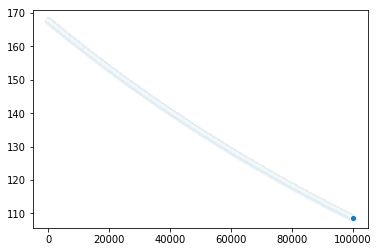

In [14]:
numIterations= 100000
alpha = 0.00001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numIterations)